<a href="https://colab.research.google.com/github/ekam1206/INSE-6220/blob/main/Pizza_code_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
df = pd.read_csv('/content/Pizza Updated.csv')
df.head(n=25)

,mois,prot,fat,ash,sodium,carb,cal,Updated Cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93,2
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84,2
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95,2
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74,2
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67,2
5,31.14,20.23,42.31,4.92,1.65,1.40,4.67,2
6,31.21,20.97,41.34,4.71,1.58,1.77,4.63,2
7,28.76,21.41,41.60,5.28,1.75,2.95,4.72,2
8,28.22,20.48,45.10,5.02,1.71,1.18,4.93,2
9,27.72,21.19,45.29,5.16,1.66,0.64,4.95,2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mois         300 non-null    float64
 1   prot         300 non-null    float64
 2   fat          300 non-null    float64
 3   ash          300 non-null    float64
 4   sodium       300 non-null    float64
 5   carb         300 non-null    float64
 6   cal          300 non-null    float64
 7   Updated Cal  300 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [40]:
y = df['Updated Cal']
target = df['Updated Cal'].to_numpy()

In [41]:
X = df.iloc[:,1:8]
X.head(10)

,prot,fat,ash,sodium,carb,cal,Updated Cal
0,21.43,44.87,5.11,1.77,0.77,4.93,2
1,21.26,43.89,5.34,1.79,1.02,4.84,2
2,19.99,45.78,5.08,1.63,0.80,4.95,2
3,20.15,43.13,4.79,1.61,1.38,4.74,2
4,21.28,41.65,4.82,1.64,1.76,4.67,2
5,20.23,42.31,4.92,1.65,1.40,4.67,2
6,20.97,41.34,4.71,1.58,1.77,4.63,2
7,21.41,41.60,5.28,1.75,2.95,4.72,2
8,20.48,45.10,5.02,1.71,1.18,4.93,2
9,21.19,45.29,5.16,1.66,0.64,4.95,2


In [6]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
prot,300.0,13.373567,6.434392,6.98,8.0600,10.440,20.0225,28.48
fat,300.0,20.229533,8.975658,4.38,14.7700,17.135,21.4350,47.20
ash,300.0,2.633233,1.269724,1.17,1.4500,2.225,3.5925,5.43
sodium,300.0,0.669400,0.370358,0.25,0.4500,0.490,0.7025,1.79
carb,300.0,22.864767,18.029722,0.51,3.4675,23.245,41.3375,48.64
cal,300.0,3.271000,0.620034,2.18,2.9100,3.215,3.5200,5.08
Updated Cal,300.0,1.433333,0.496364,1.00,1.0000,1.000,2.0000,2.00


In [7]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
prot,300.0,1.894781e-16,1.001671,-0.995315,-0.827187,-0.456682,1.035069,2.351687
fat,300.0,-2.368476e-16,1.001671,-1.768786,-0.609276,-0.345346,0.134528,3.009866
ash,300.0,-5.210647e-16,1.001671,-1.154329,-0.933440,-0.322051,0.756755,2.206338
sodium,300.0,-2.368476e-16,1.001671,-1.134311,-0.593390,-0.485206,0.089522,3.030779
carb,300.0,-4.736952e-17,1.001671,-1.241956,-1.077647,0.021124,1.026283,1.431985
cal,300.0,1.894781e-16,1.001671,-1.762520,-0.583199,-0.090468,0.402262,2.922456
Updated Cal,300.0,-7.105427e-17,1.001671,-0.874475,-0.874475,-0.874475,1.143544,1.143544


In [9]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

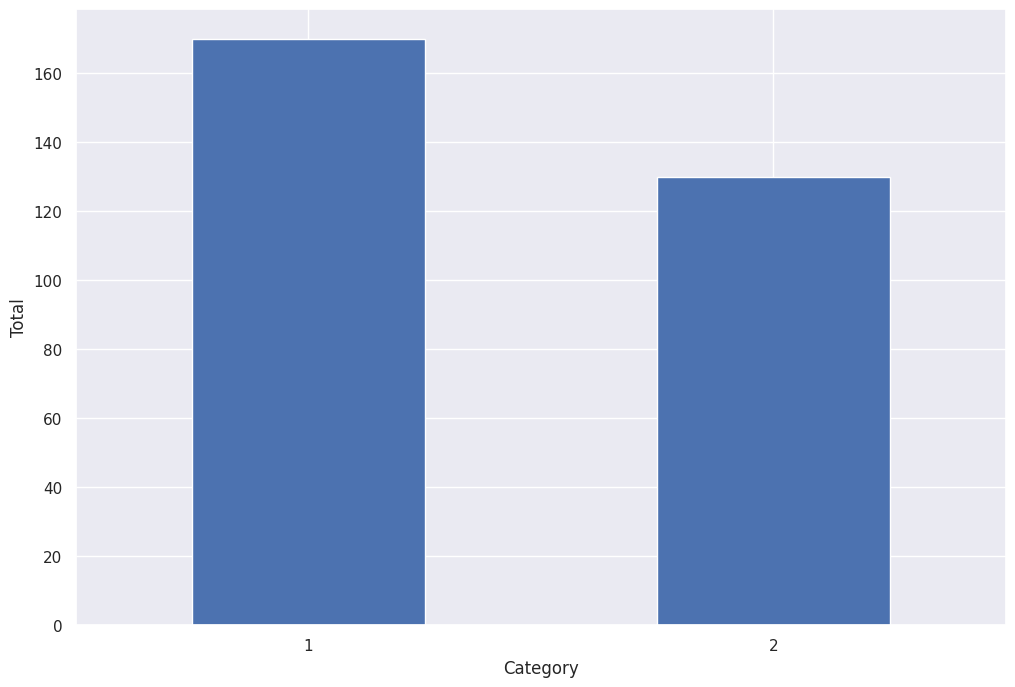

In [10]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Category')
plt.ylabel('Total')
plt.show()

<ipython-input-11-2ae9b7838308>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


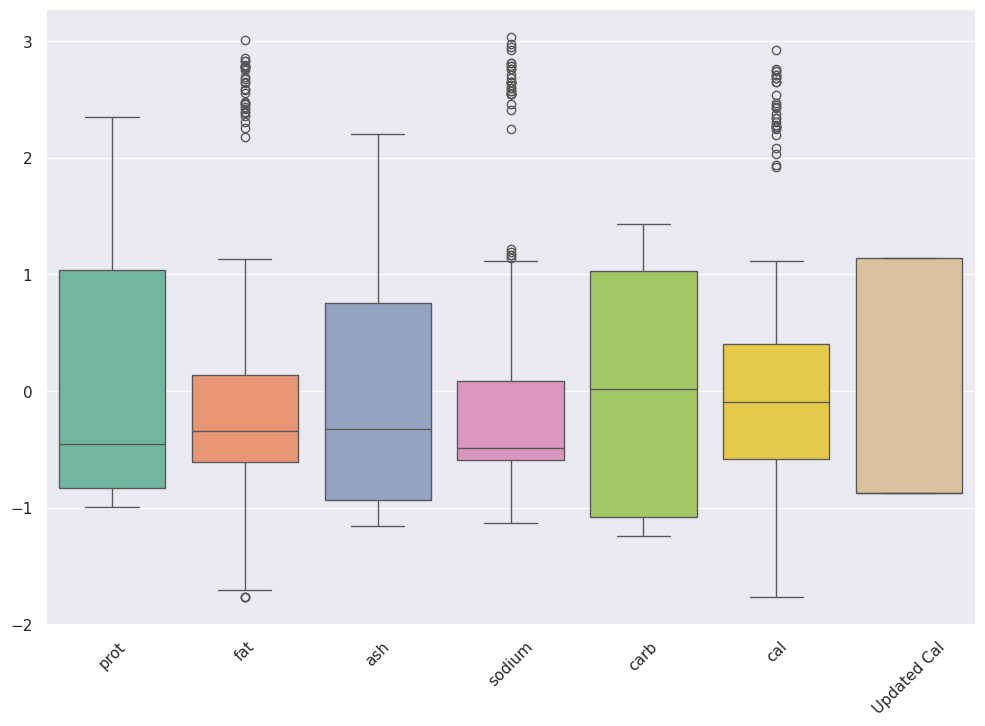

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-12-22fad8361788>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


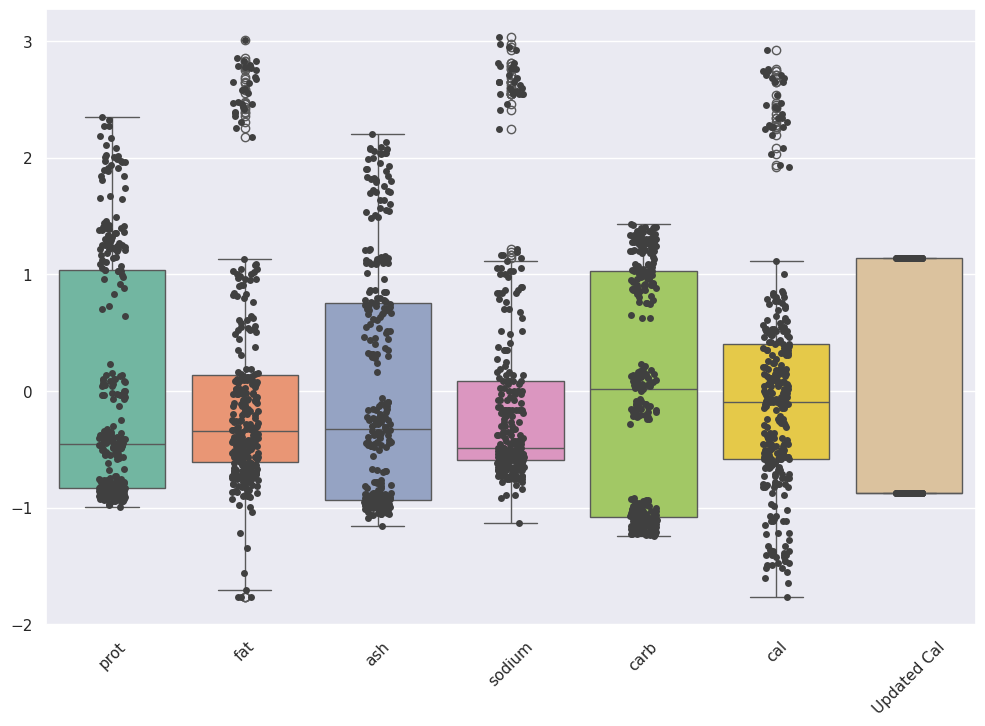

In [12]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [13]:
df.describe()

,prot,fat,ash,sodium,carb,cal,Updated Cal
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,1.894781e-16,-2.368476e-16,-5.210647e-16,-2.368476e-16,-4.736952e-17,1.894781e-16,-7.105427e-17
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-9.953153e-01,-1.768786e+00,-1.154329e+00,-1.134311e+00,-1.241956e+00,-1.762520e+00,-8.744746e-01
25%,-8.271869e-01,-6.092762e-01,-9.334397e-01,-5.933900e-01,-1.077647e+00,-5.831987e-01,-8.744746e-01
50%,-4.566815e-01,-3.453456e-01,-3.220508e-01,-4.852059e-01,2.112449e-02,-9.046850e-02,-8.744746e-01
75%,1.035069e+00,1.345284e-01,7.567549e-01,8.952238e-02,1.026283e+00,4.022617e-01,1.143544e+00
max,2.351687e+00,3.009866e+00,2.206338e+00,3.030779e+00,1.431985e+00,2.922456e+00,1.143544e+00


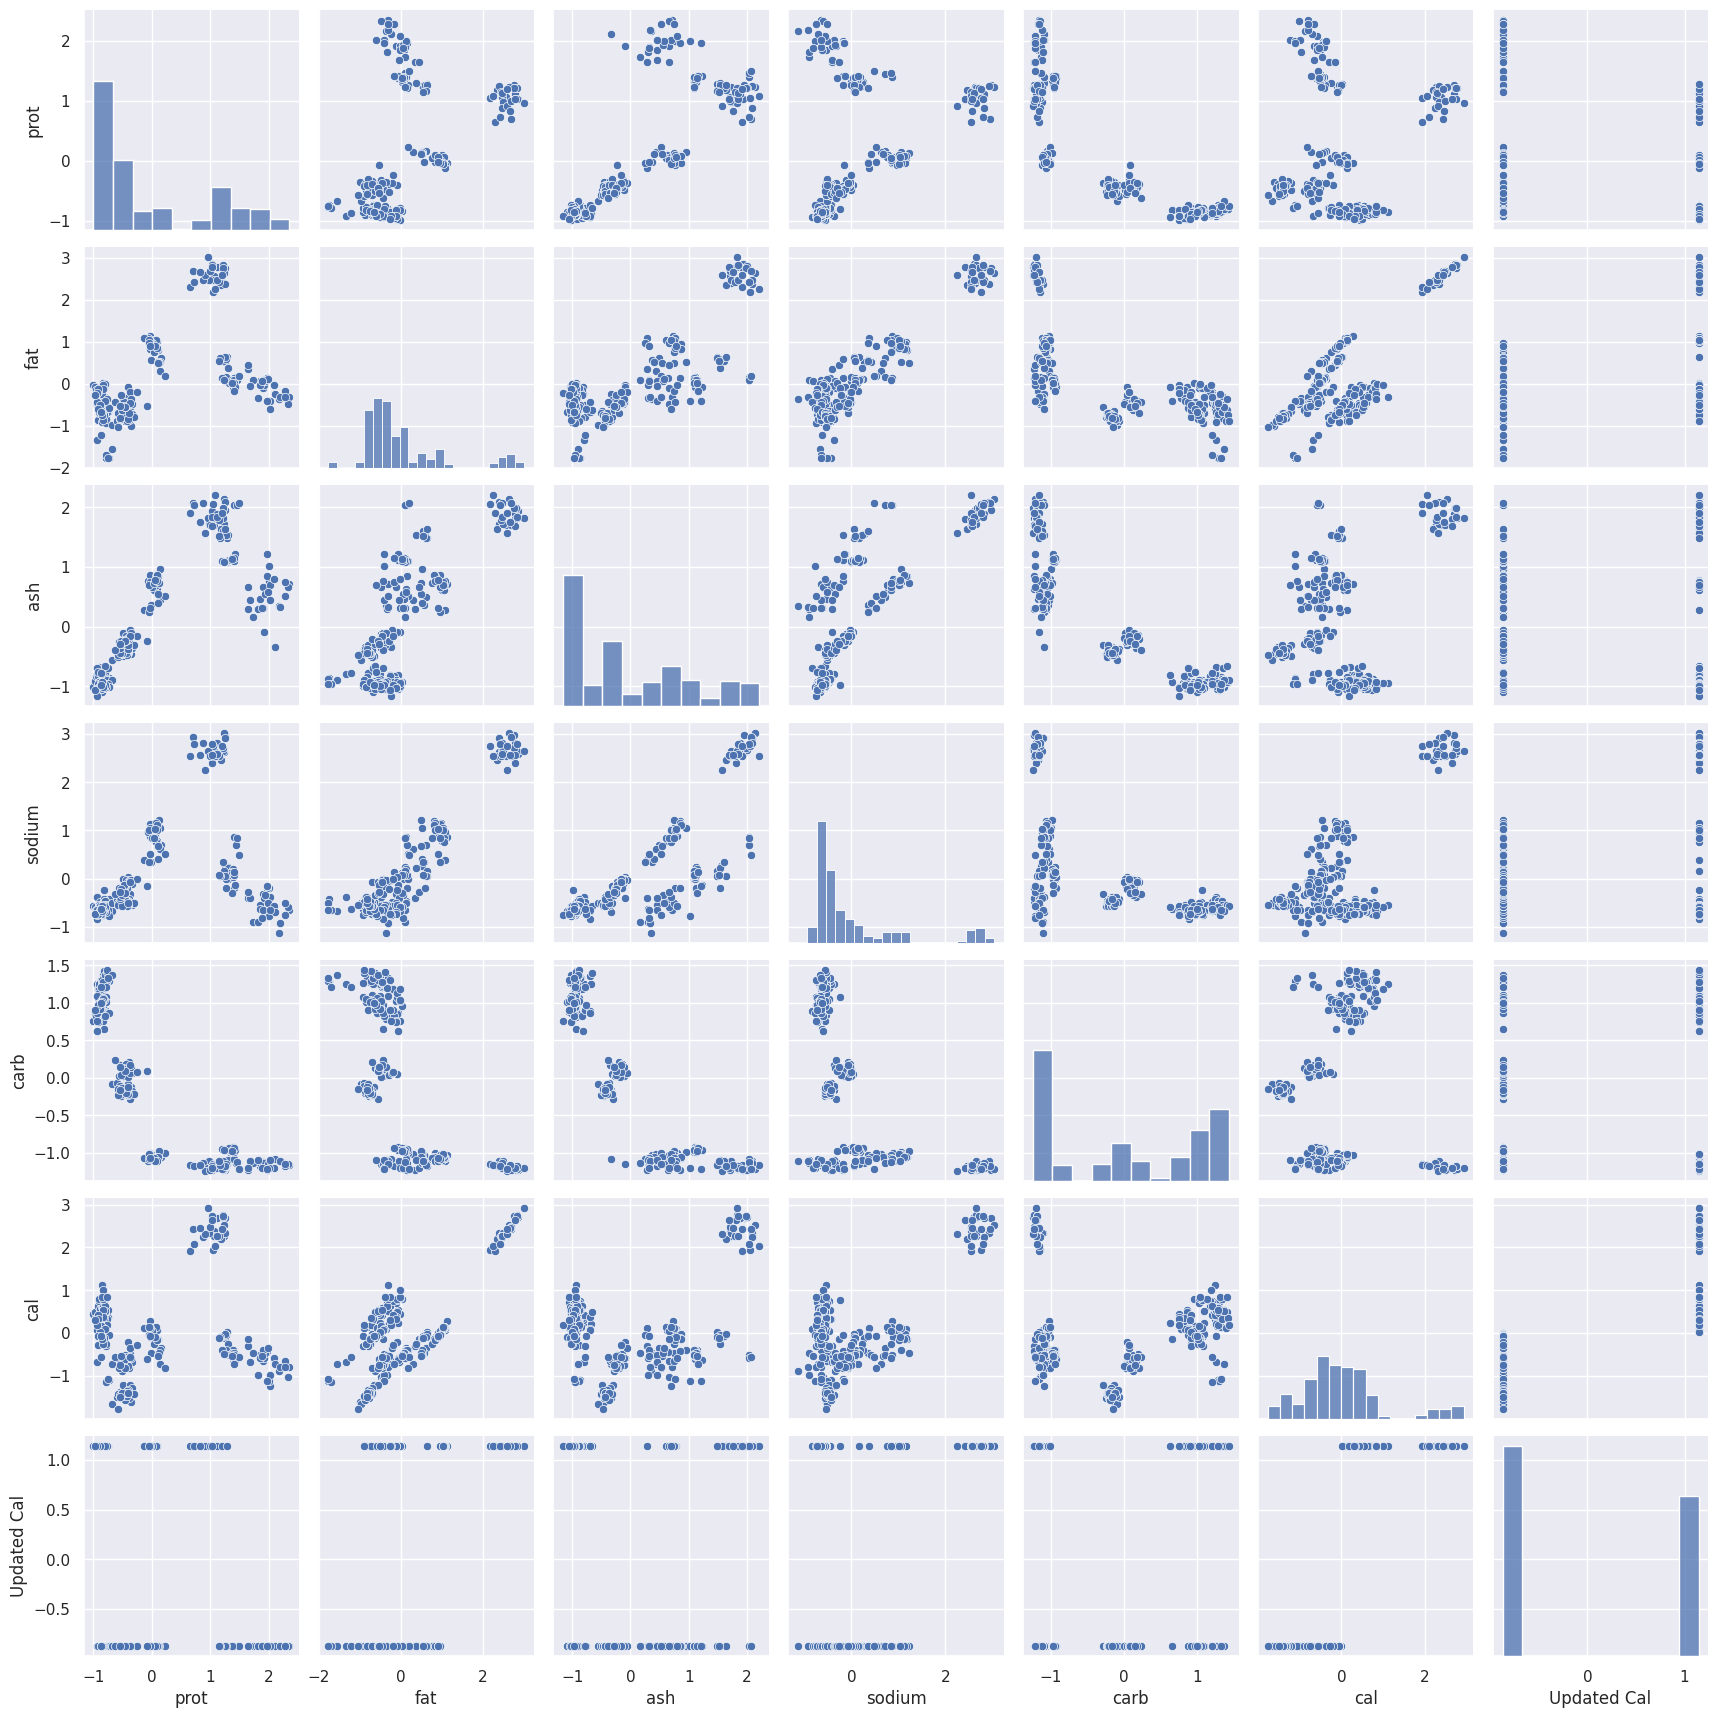

In [14]:
sns.pairplot(df)

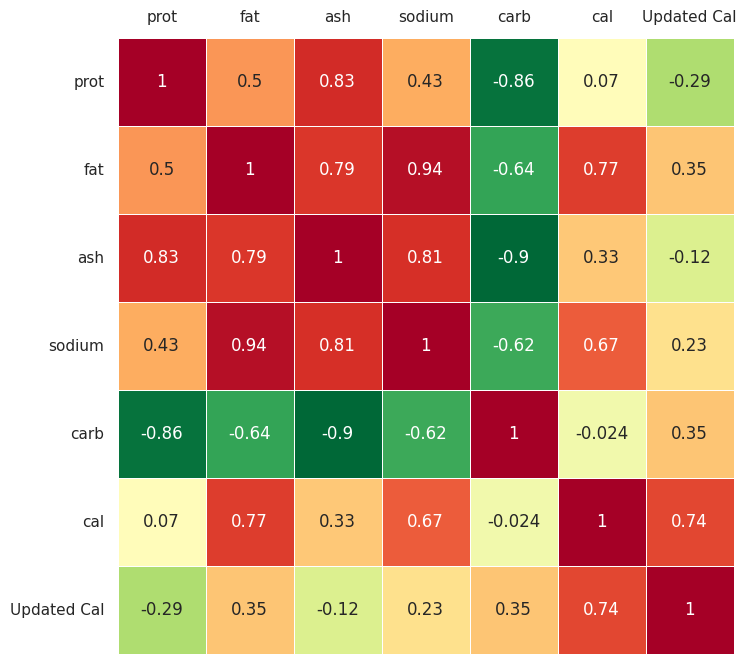

In [15]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Text(0, 0.5, 'A2')

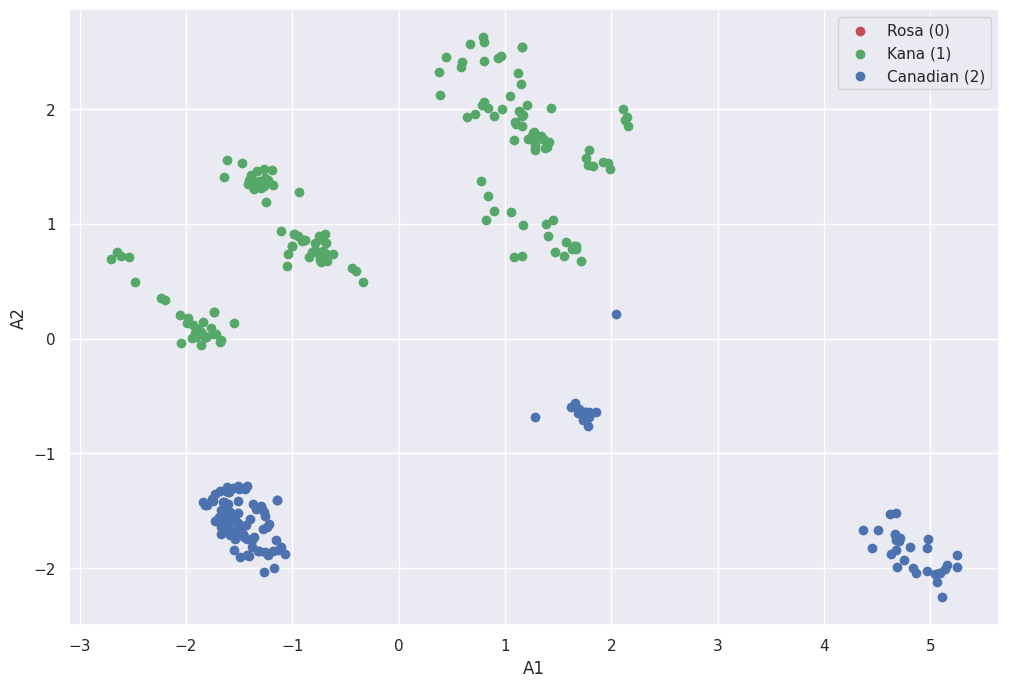

In [16]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('A1')
plt.ylabel('A2')

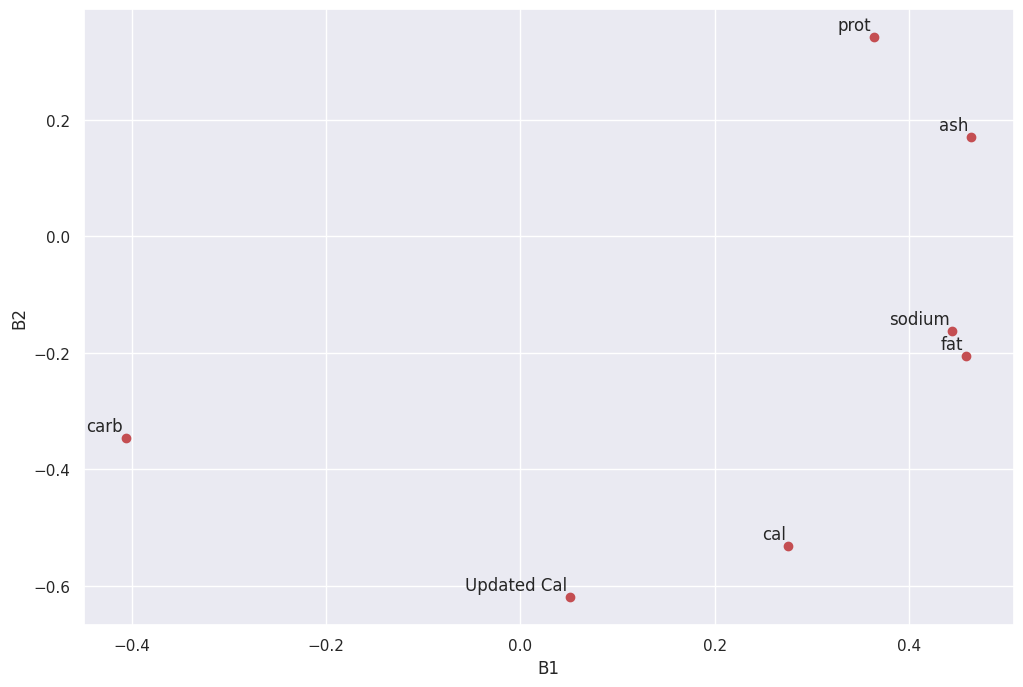

In [17]:
A = pca.components_.T
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


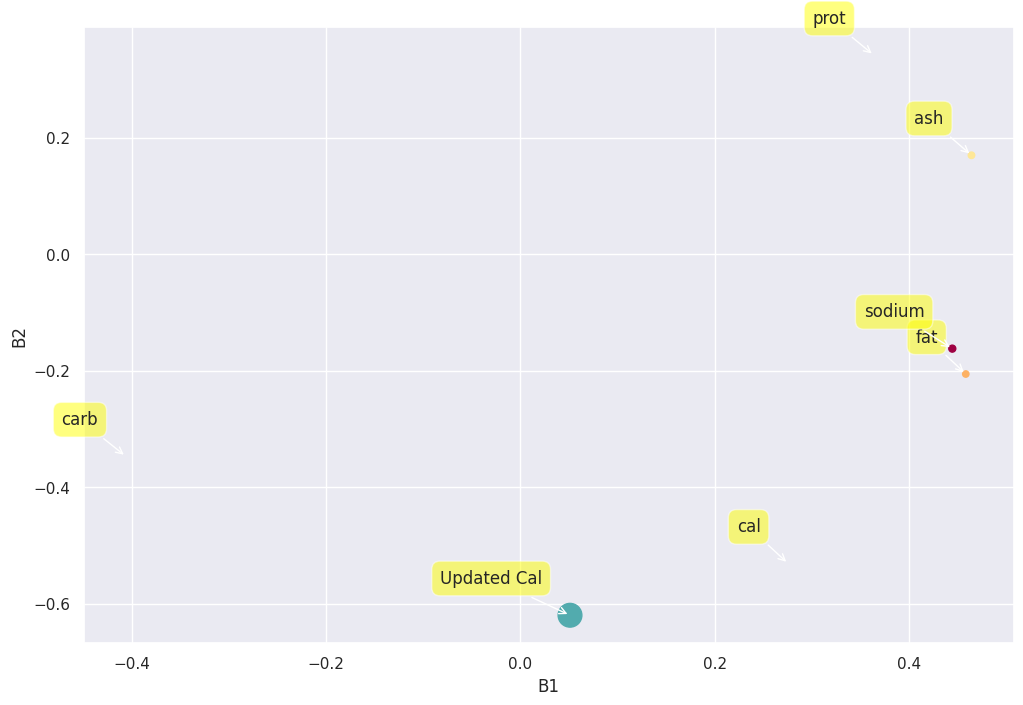

In [18]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

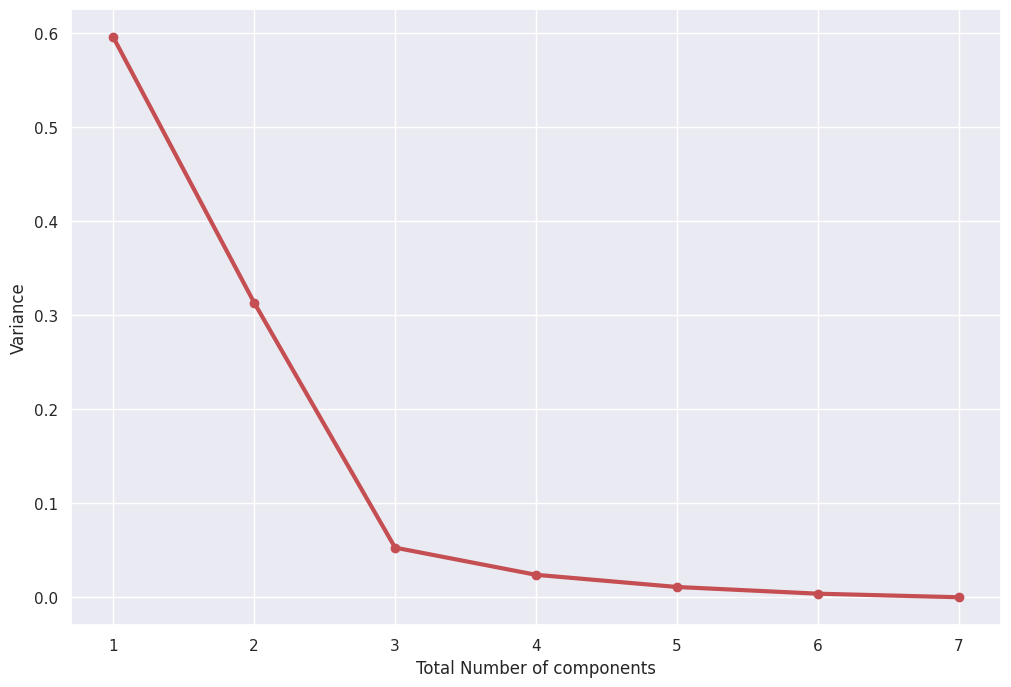

[4.18151521e+00 2.19974978e+00 3.70659310e-01 1.67717471e-01
 7.68259802e-02 2.67801817e-02 1.63433966e-04]


In [19]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Total Number of components')
plt.ylabel('Variance')
plt.show()
print(Lambda)

Text(0, 0.5, 'Cumulative Variance')

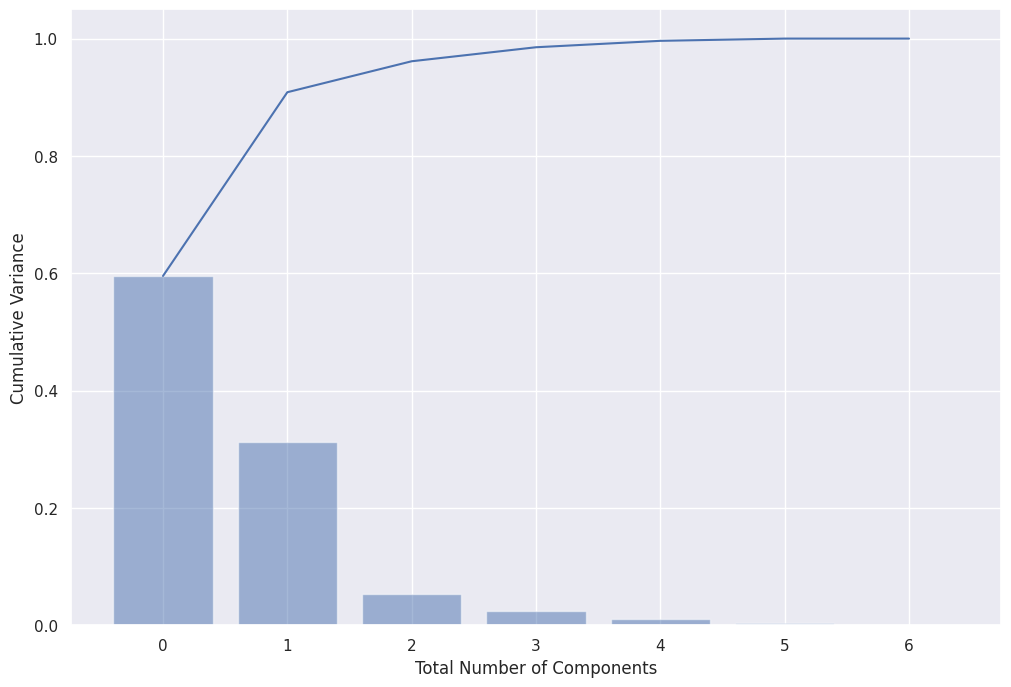

In [20]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Total Number of Components')
plt.ylabel('Cumulative Variance')

In [21]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance


{'0': 'PC 1 (59.5%)',
 '1': 'PC 2 (31.3%)',
 '2': 'PC 3 (5.3%)',
 '3': 'PC 4 (2.4%)',
 '4': 'PC 5 (1.1%)',
 '5': 'PC 6 (0.4%)',
 '6': 'PC 7 (0.0%)'}

[[ 3.64027167e-01  3.41679224e-01  6.82753539e-01 -3.02364370e-01
   6.60427479e-02 -3.84524173e-01 -2.02342378e-01]
 [ 4.58606791e-01 -2.05424364e-01 -1.46833521e-01  4.18417151e-02
  -5.30616944e-01  2.00659141e-01 -6.34311751e-01]
 [ 4.64472825e-01  1.70001588e-01 -9.21868841e-03  4.38847068e-02
   5.85255719e-01  6.40958877e-01 -1.03197756e-03]
 [ 4.44715573e-01 -1.61856199e-01 -5.14942546e-01  5.07138033e-02
   3.57627694e-01 -6.16757979e-01  2.22308343e-03]
 [-4.06168118e-01 -3.46918162e-01 -9.06693997e-03 -4.51093102e-01
   4.35098573e-01  1.89000894e-02 -5.66956851e-01]
 [ 2.75825412e-01 -5.30930720e-01  8.48710637e-02 -5.98447368e-01
  -1.58063676e-01  1.28243737e-01  4.85036062e-01]
 [ 5.10381157e-02 -6.19450182e-01  4.89644161e-01  5.83697749e-01
   1.71368889e-01 -6.20863360e-02 -3.24923406e-04]]


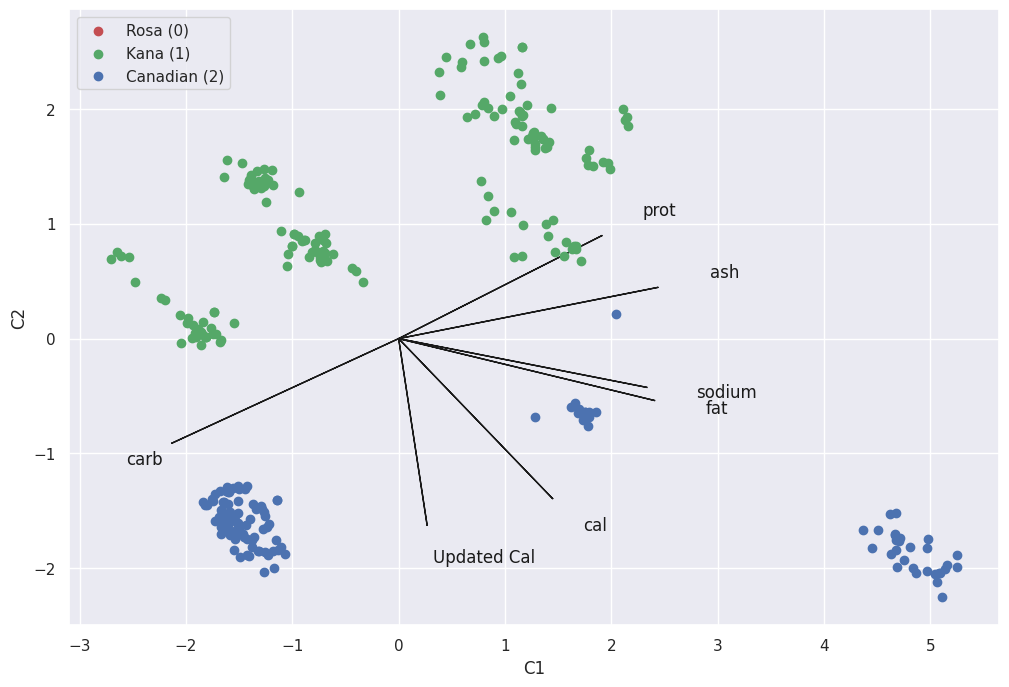

In [22]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('C1')
plt.ylabel('C2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')
print(A)

In [23]:
!pip install pca

In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [25]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC      feature   loading  type
0  PC1          ash  0.464473  best
1  PC2  Updated Cal -0.619450  best
2  PC3         prot  0.682754  best
3  PC1          fat  0.458607  weak
4  PC3       sodium -0.514943  weak
5  PC1         carb -0.406168  weak
6  PC2          cal -0.530931  weak


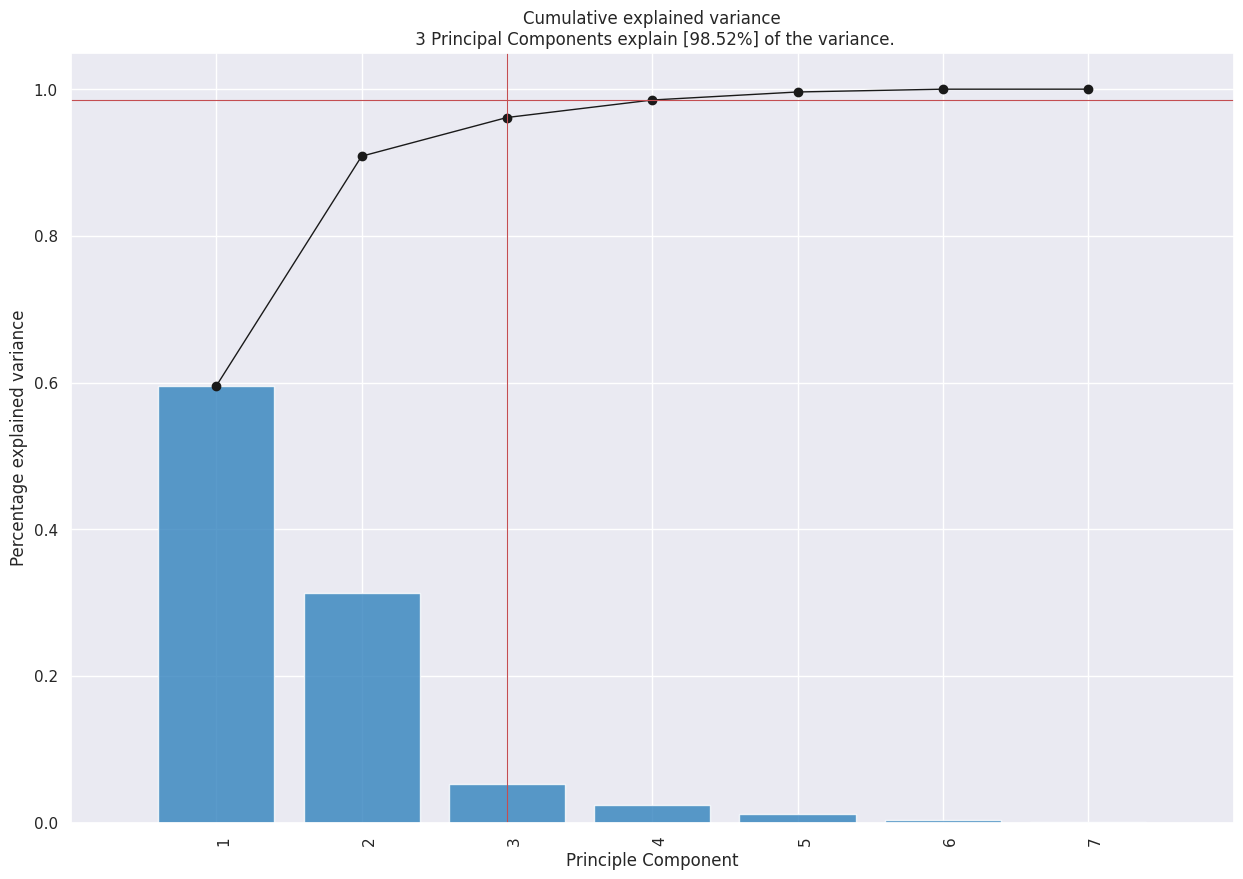

In [26]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


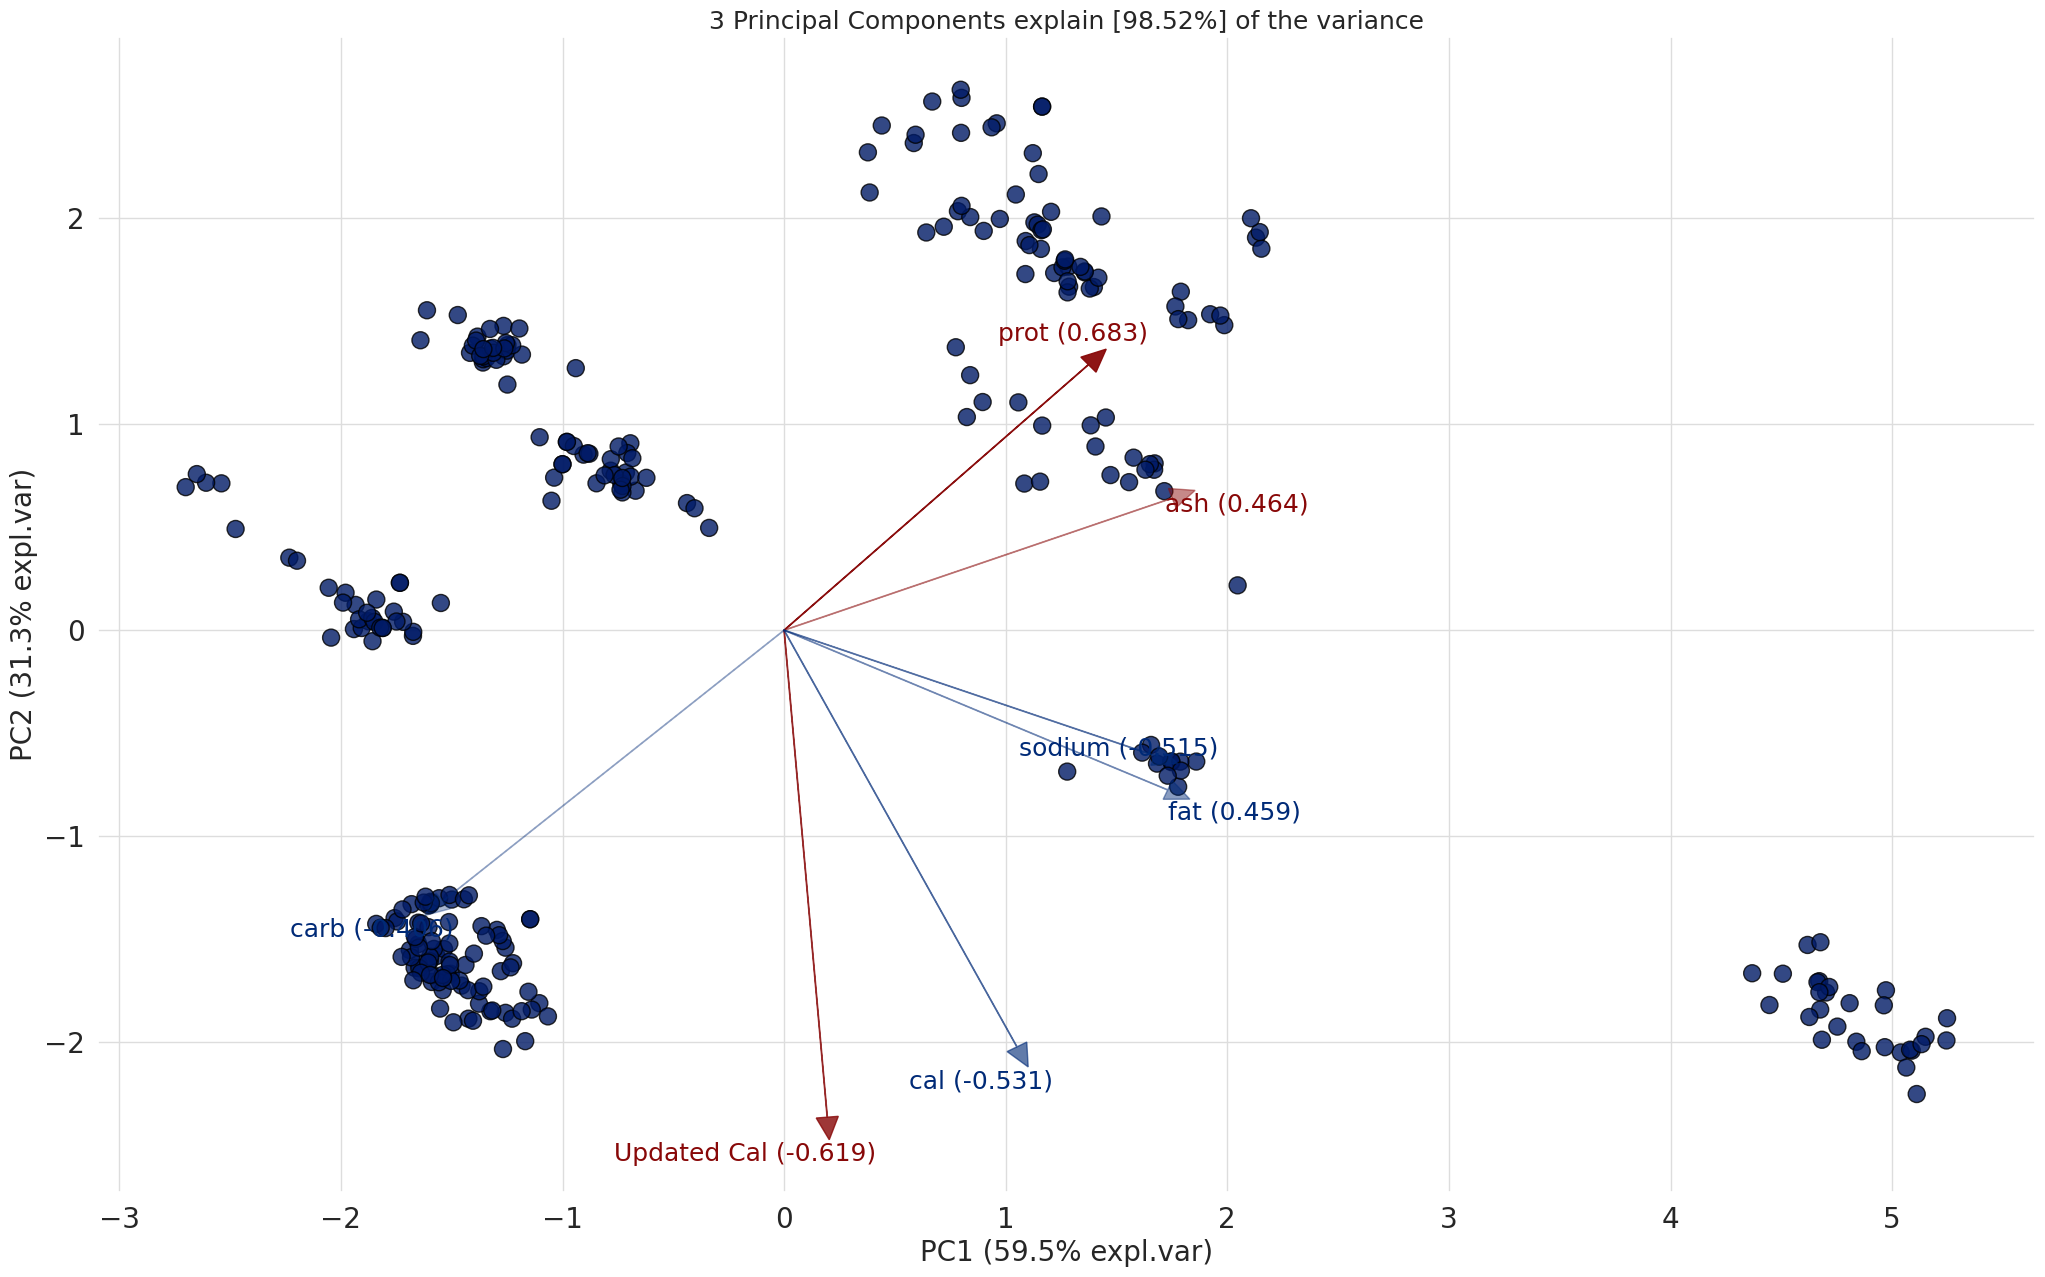

In [27]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.52%] of the variance'}, xlabel='PC1 (59.5% expl.var)', ylabel='PC2 (31.3% expl.var)'>)

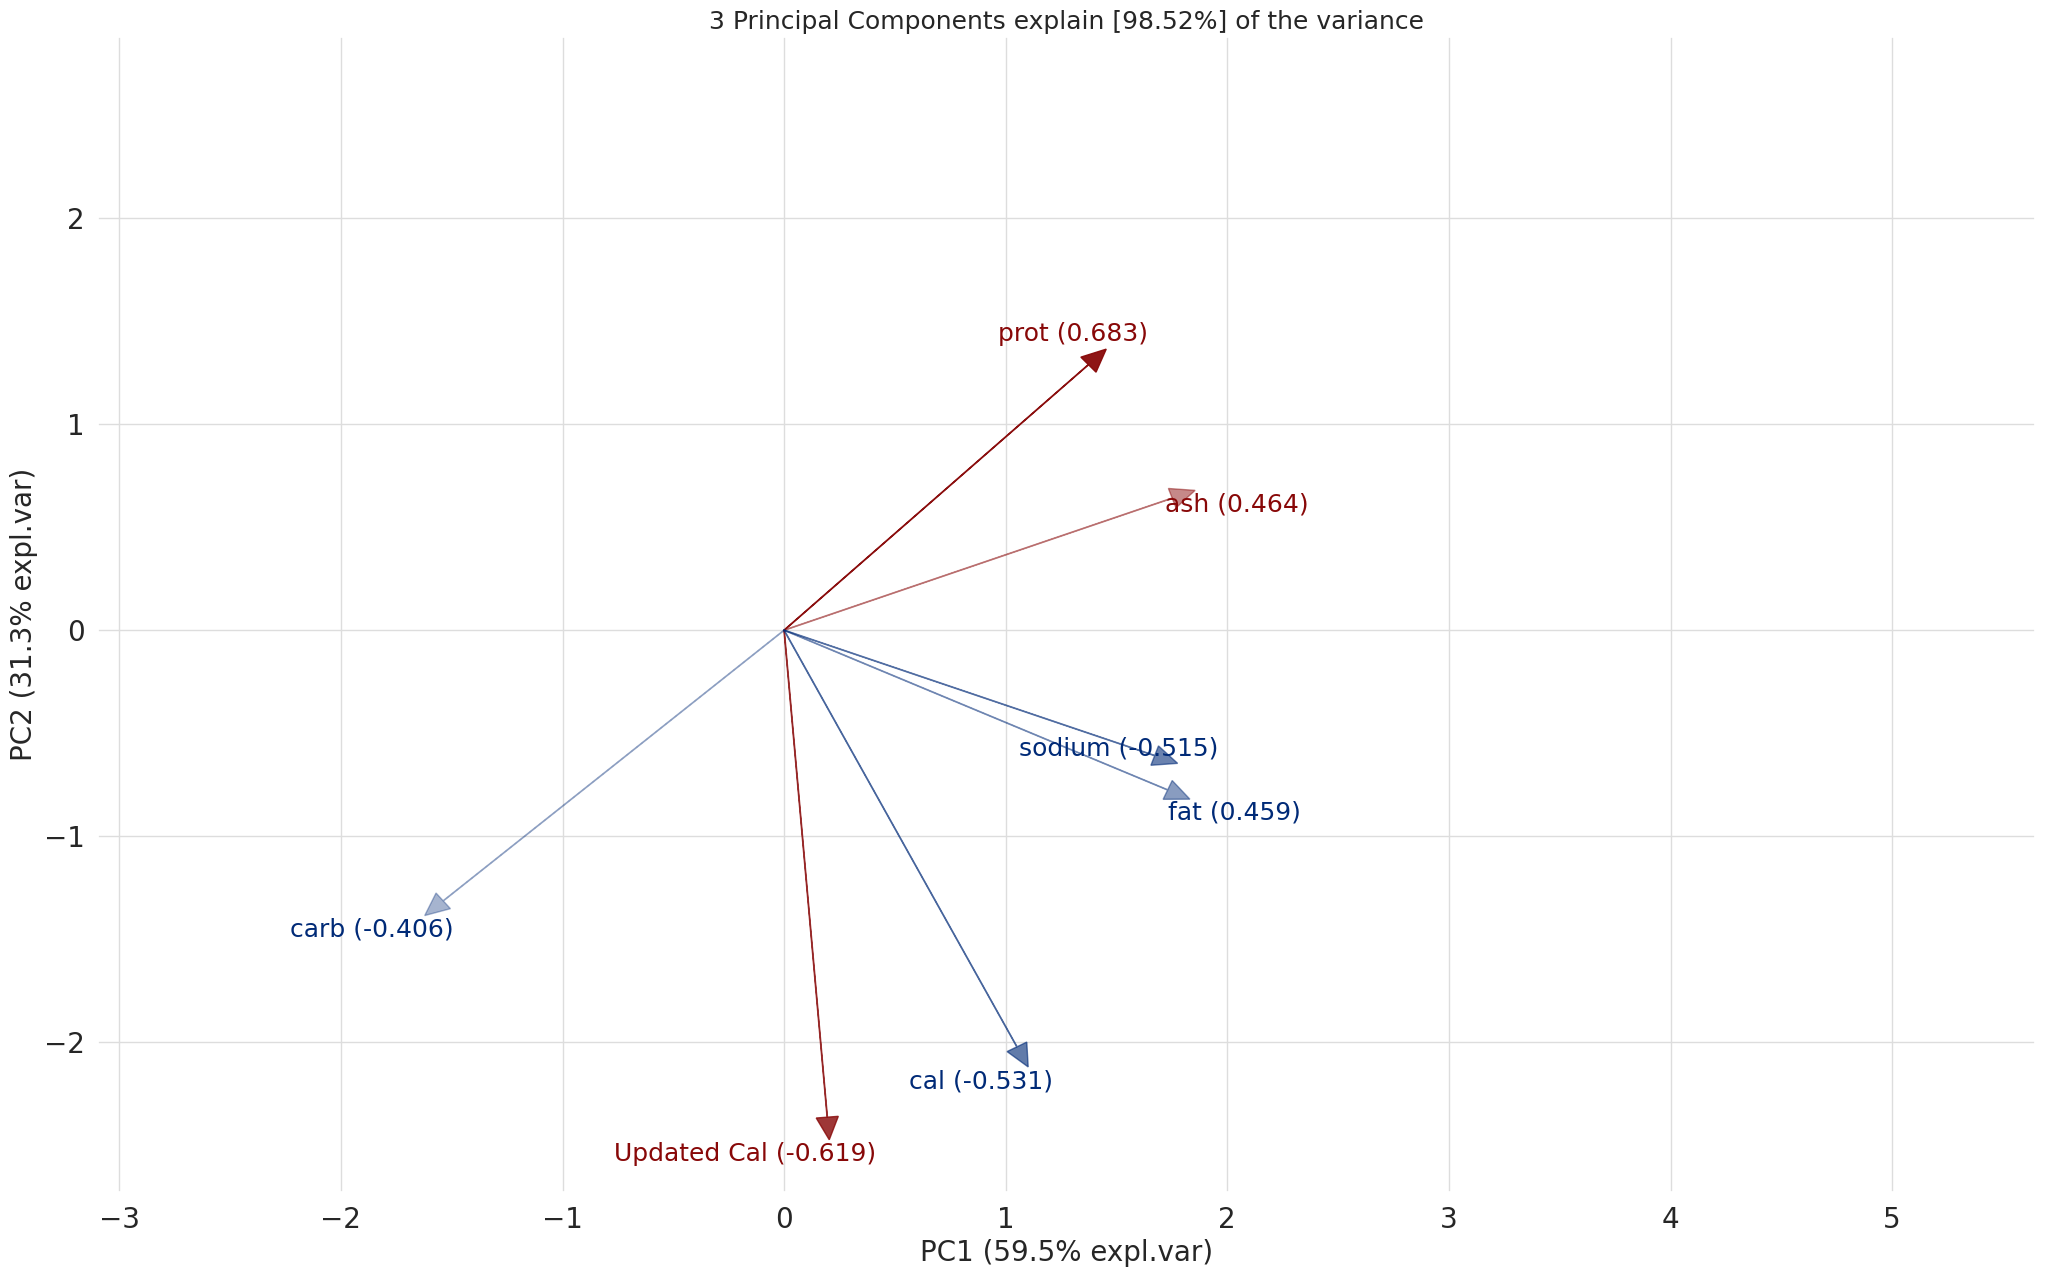

In [28]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


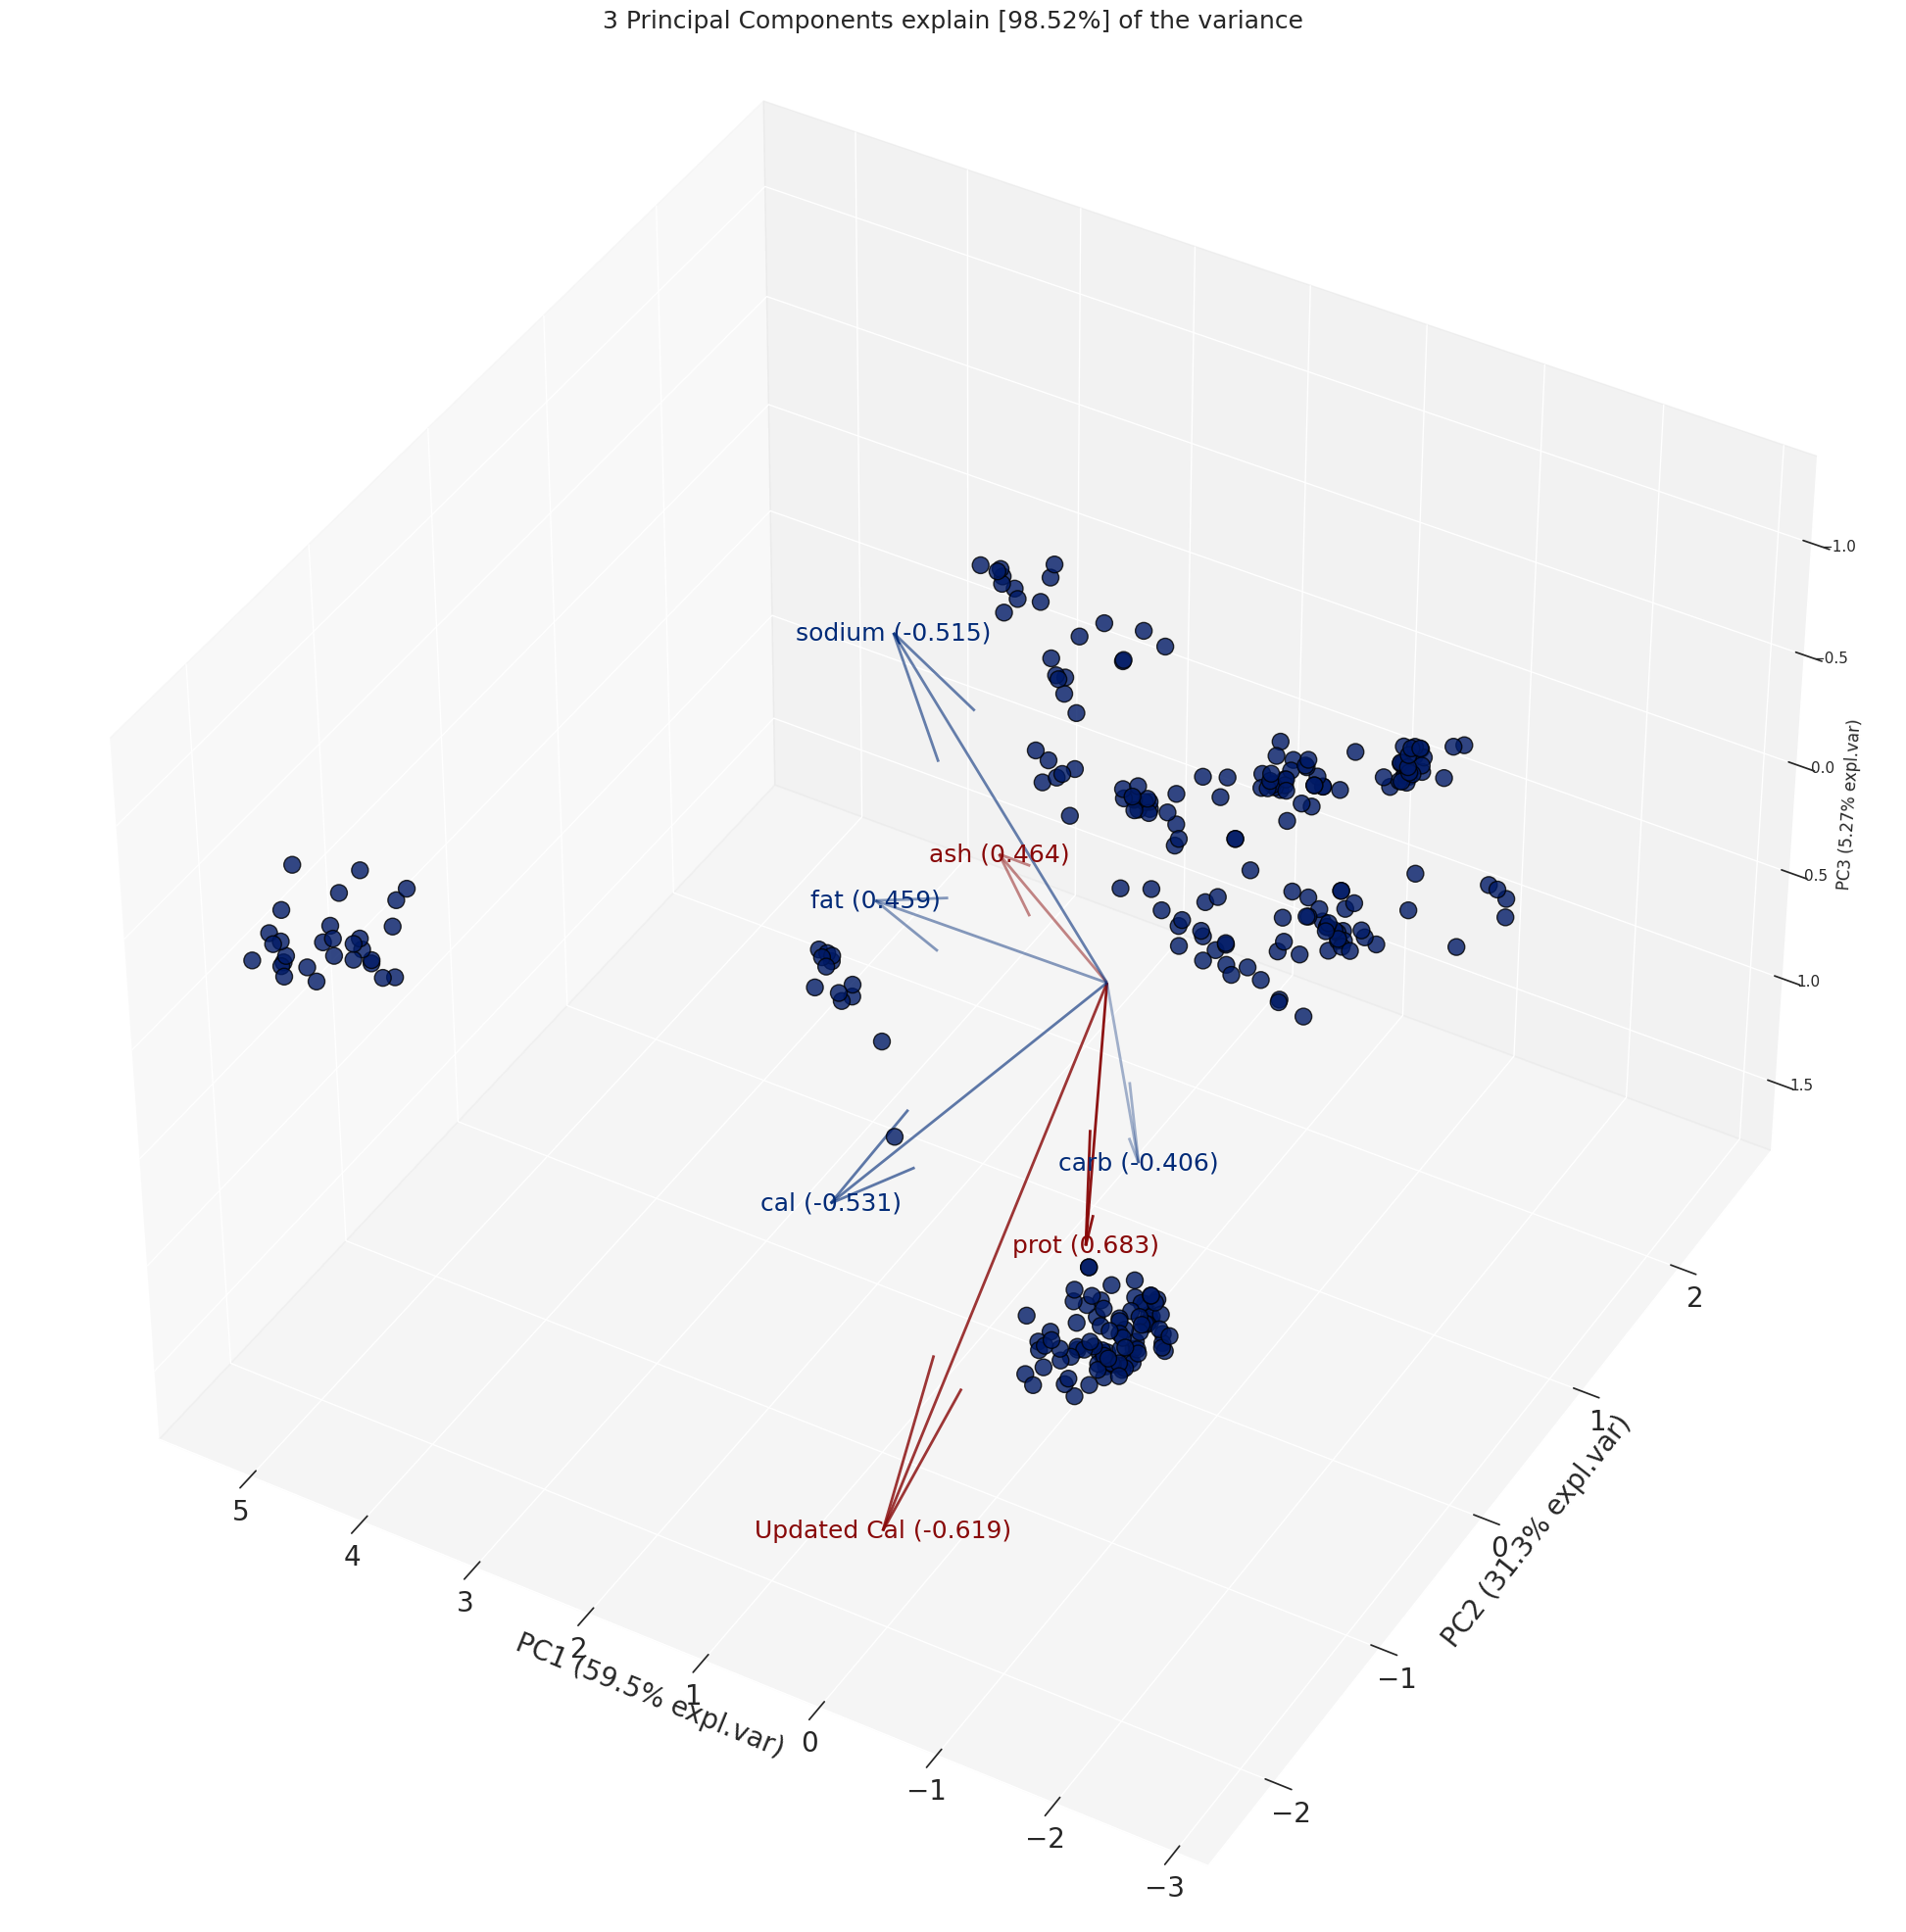

In [29]:
ax = model.biplot3d(legend=False)

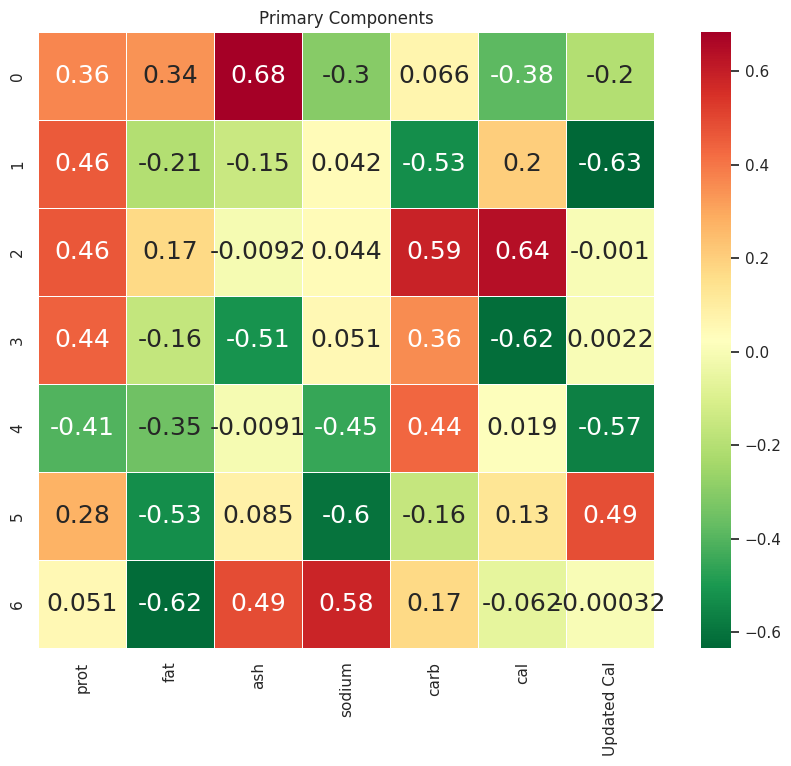

PC1:[ 0.36402717  0.45860679  0.46447282  0.44471557 -0.40616812  0.27582541
  0.05103812]
PC2:[ 0.34167922 -0.20542436  0.17000159 -0.1618562  -0.34691816 -0.53093072
 -0.61945018]
[[ 3.64027167e-01  3.41679224e-01  6.82753539e-01 -3.02364370e-01
   6.60427479e-02 -3.84524173e-01 -2.02342378e-01]
 [ 4.58606791e-01 -2.05424364e-01 -1.46833521e-01  4.18417151e-02
  -5.30616944e-01  2.00659141e-01 -6.34311751e-01]
 [ 4.64472825e-01  1.70001588e-01 -9.21868841e-03  4.38847068e-02
   5.85255719e-01  6.40958877e-01 -1.03197756e-03]
 [ 4.44715573e-01 -1.61856199e-01 -5.14942546e-01  5.07138033e-02
   3.57627694e-01 -6.16757979e-01  2.22308343e-03]
 [-4.06168118e-01 -3.46918162e-01 -9.06693997e-03 -4.51093102e-01
   4.35098573e-01  1.89000894e-02 -5.66956851e-01]
 [ 2.75825412e-01 -5.30930720e-01  8.48710637e-02 -5.98447368e-01
  -1.58063676e-01  1.28243737e-01  4.85036062e-01]
 [ 5.10381157e-02 -6.19450182e-01  4.89644161e-01  5.83697749e-01
   1.71368889e-01 -6.20863360e-02 -3.24923406e-04]

In [30]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Primary Components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')
print (A)

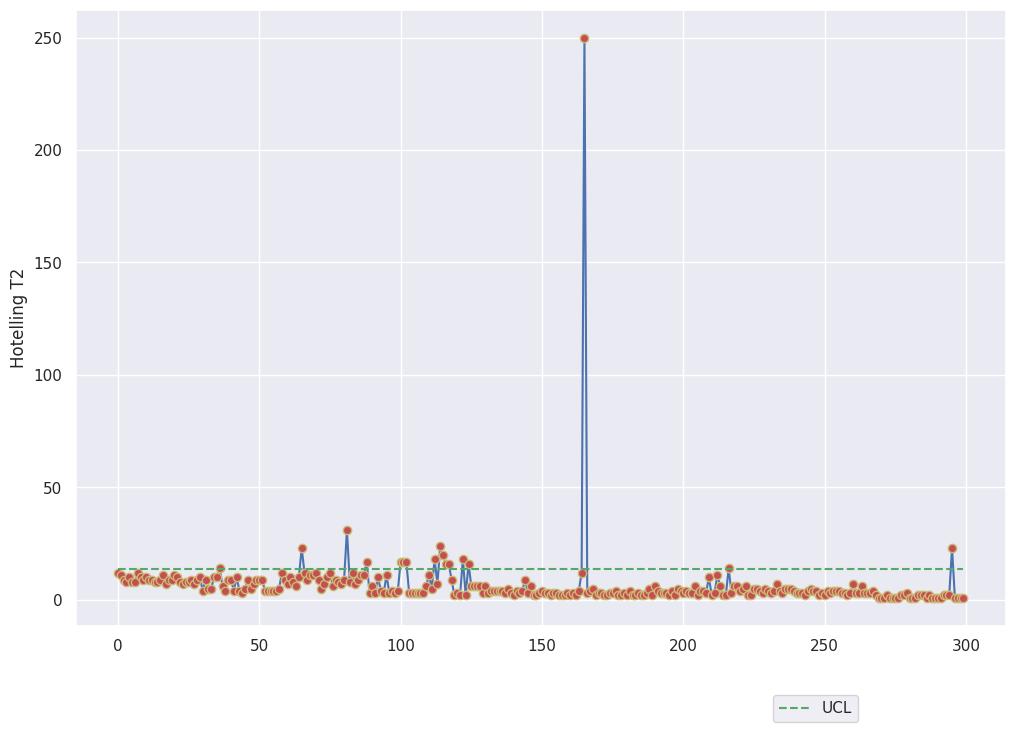

In [31]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling T2')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [32]:
print(np.argwhere(Tsquare>UCL))

[[ 36]
 [ 65]
 [ 81]
 [ 88]
 [100]
 [101]
 [102]
 [112]
 [114]
 [115]
 [116]
 [117]
 [122]
 [124]
 [165]
 [216]
 [295]]


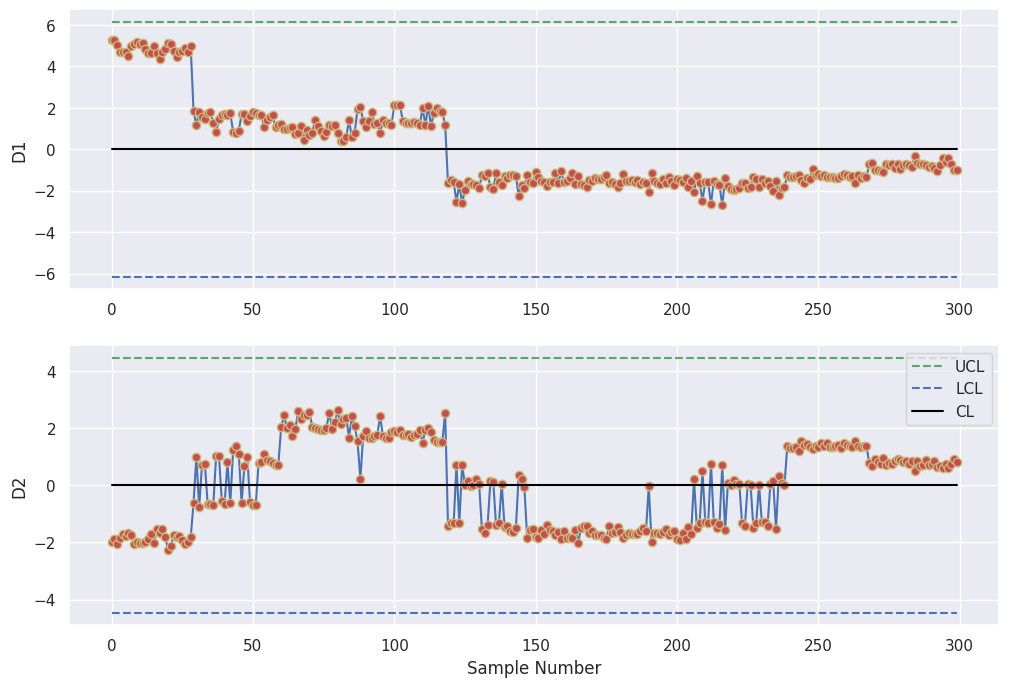

In [33]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('D1')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('D2')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()


In [34]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


In [35]:
print(df)

         prot       fat       ash    sodium      carb       cal  Updated Cal
0    1.254181  2.749841  1.953894  2.976687 -1.227511  2.680129     1.143544
1    1.227717  2.640475  2.135338  3.030779 -1.213622  2.534733     1.143544
2    1.030010  2.851396  1.930227  2.598042 -1.225844  2.712439     1.143544
3    1.054918  2.555660  1.701449  2.543950 -1.193622  2.373183     1.143544
4    1.230830  2.390494  1.725116  2.625088 -1.172510  2.260097     1.143544
..        ...       ...       ...       ...       ...       ...          ...
295 -0.358607 -0.360411 -0.112995 -0.025423  0.138627 -0.583199    -0.874475
296 -0.246521 -0.197477 -0.160329  0.001623  0.072514 -0.276252    -0.874475
297 -0.367947 -0.468662 -0.160329 -0.079515  0.173072 -0.567044    -0.874475
298 -0.458238 -0.563521 -0.247106 -0.295884  0.089181 -0.825525    -0.874475
299 -0.539189 -0.527809 -0.286551 -0.268838  0.145294 -0.744750    -0.874475

[300 rows x 7 columns]


In [42]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.3, random_state=0)
y_train = y_train.to_numpy().reshape(-1, 1)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)




Train Dataset Size: 210
Test Dataset Size: 90


In [43]:
# Define the evaluation metric
scoring = ['f1_macro']

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        33

    accuracy                          1.000        90
   macro avg      1.000     1.000     1.000        90
weighted avg      1.000     1.000     1.000        90



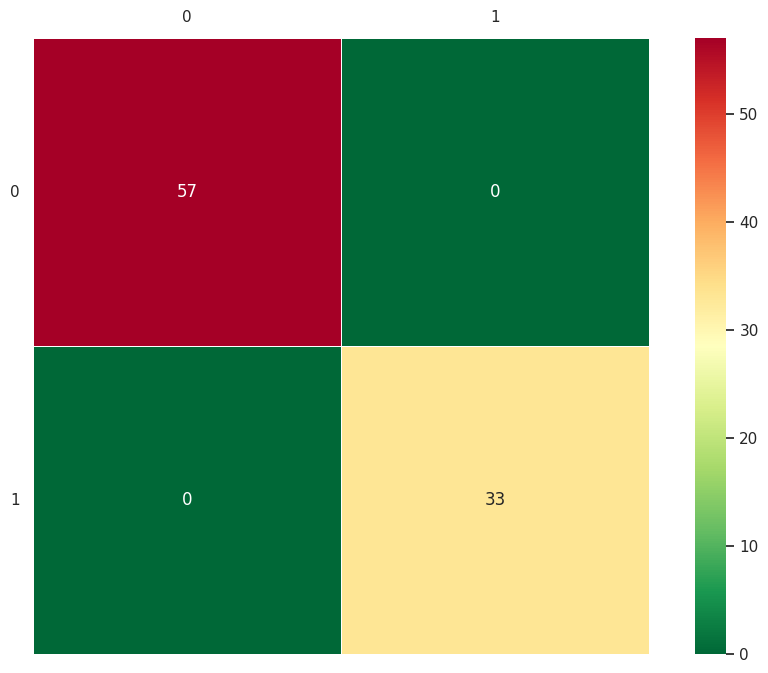

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      1.000     0.982     0.991        57
           2      0.971     1.000     0.985        33

    accuracy                          0.989        90
   macro avg      0.985     0.991     0.988        90
weighted avg      0.989     0.989     0.989        90



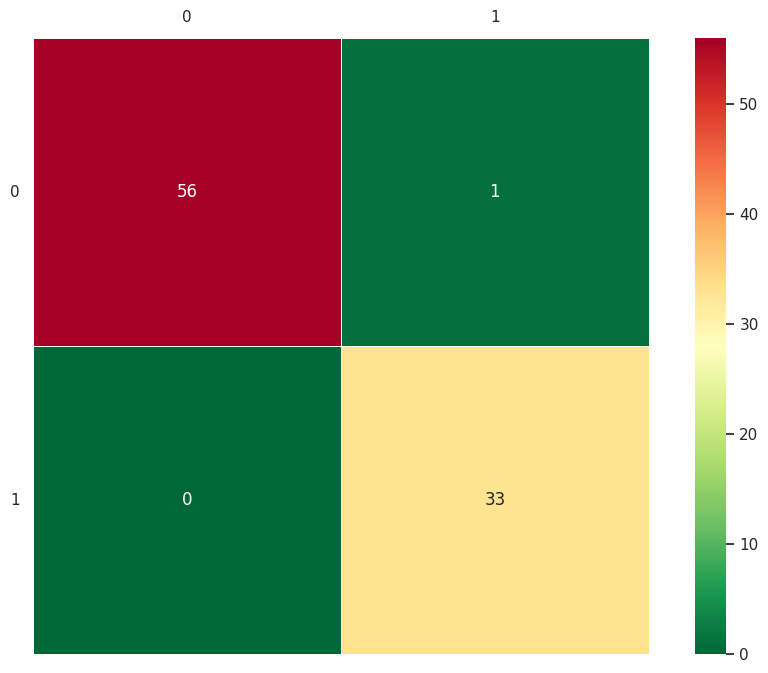

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        33

    accuracy                          1.000        90
   macro avg      1.000     1.000     1.000        90
weighted avg      1.000     1.000     1.000        90



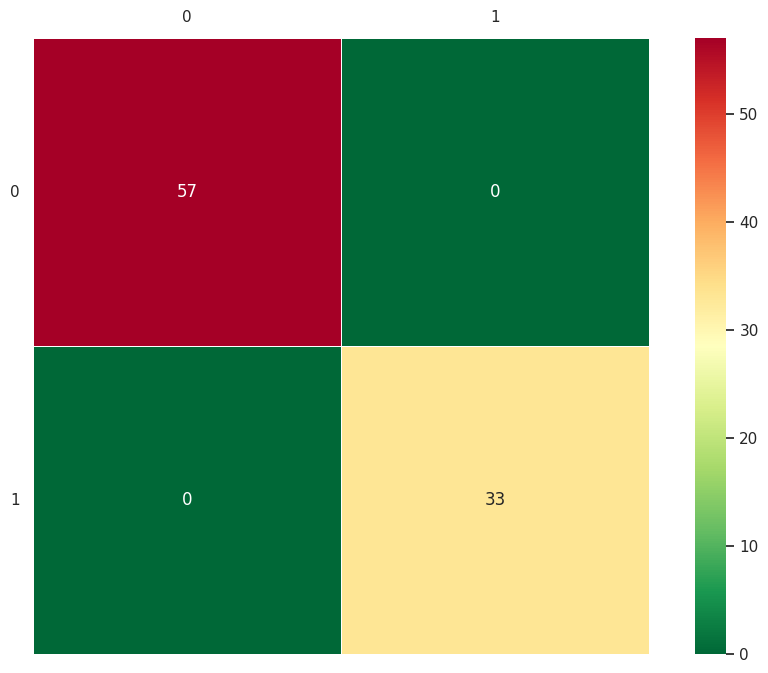

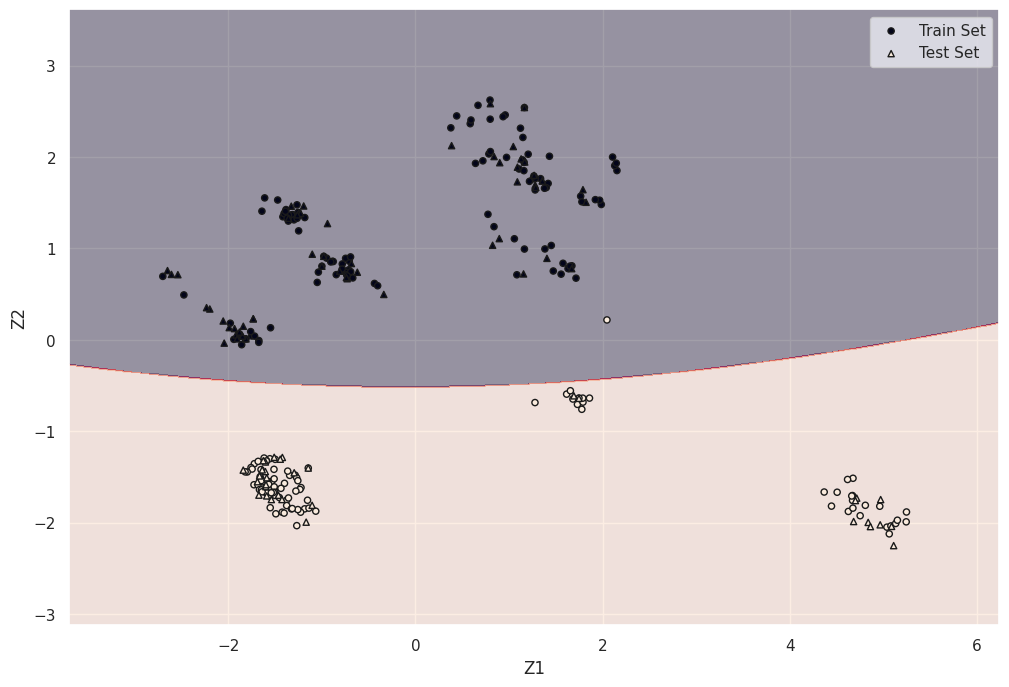

In [45]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  ytr = ytr.ravel()
  ytr = ytr.astype('float64')
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  y_pred = pd.Series(y_pred, dtype='float64')
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

                                    0         1         2         3         4
knn_full_data fit_time       0.007891  0.001794  0.007928  0.008330  0.008763
knn_Z  fit_time              0.001478  0.001526  0.010216  0.003546  0.001860
knn_Z12 fit_time             0.001596  0.001659  0.001438  0.001672  0.008012
knn_full_data test_f1_macro  0.976068  1.000000  0.976068  0.951945  0.976068
knn_Z  test_f1_macro         1.000000  1.000000  1.000000  1.000000  1.000000
knn_Z12 test_f1_macro        1.000000  1.000000  1.000000  1.000000  0.976068

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     0.982     0.991        57
           2      0.971     1.000     0.985        33

    accuracy                          0.989        90
   macro avg      0.985     0.991     0.988        90
weighted avg      0.989     0.989     0.989        90



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


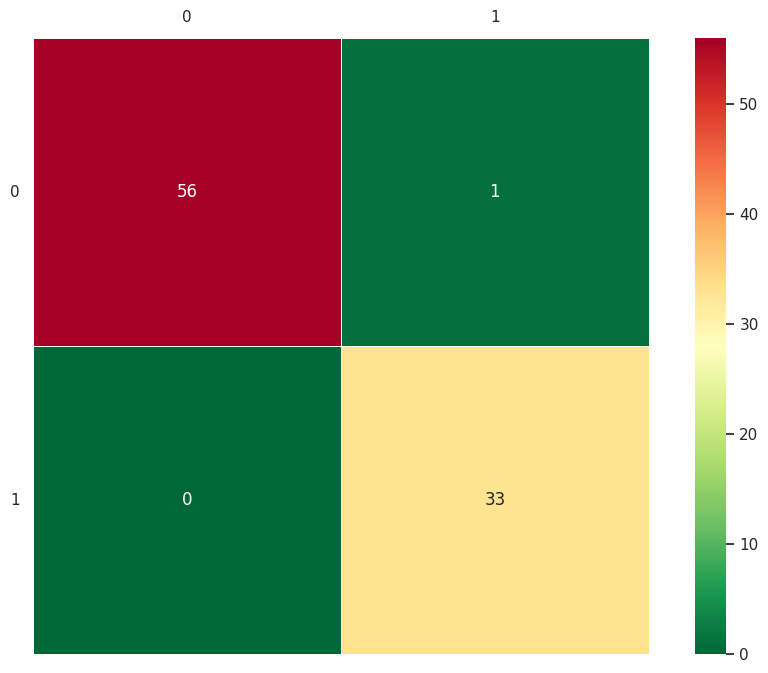

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        33

    accuracy                          1.000        90
   macro avg      1.000     1.000     1.000        90
weighted avg      1.000     1.000     1.000        90



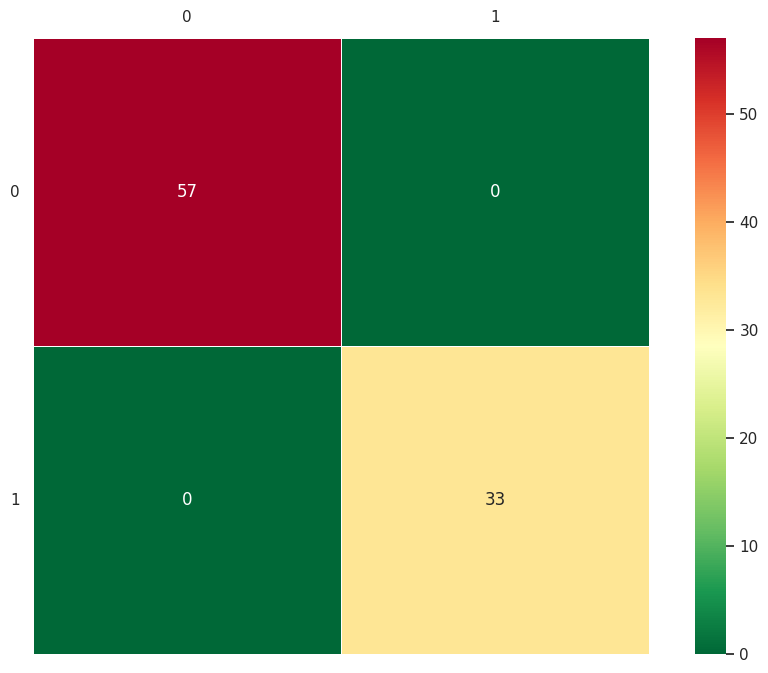

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        33

    accuracy                          1.000        90
   macro avg      1.000     1.000     1.000        90
weighted avg      1.000     1.000     1.000        90



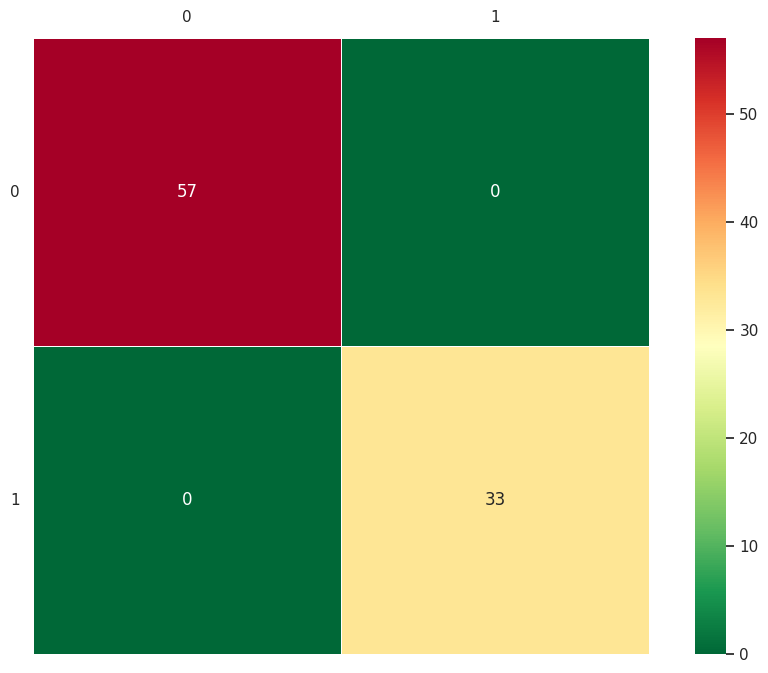

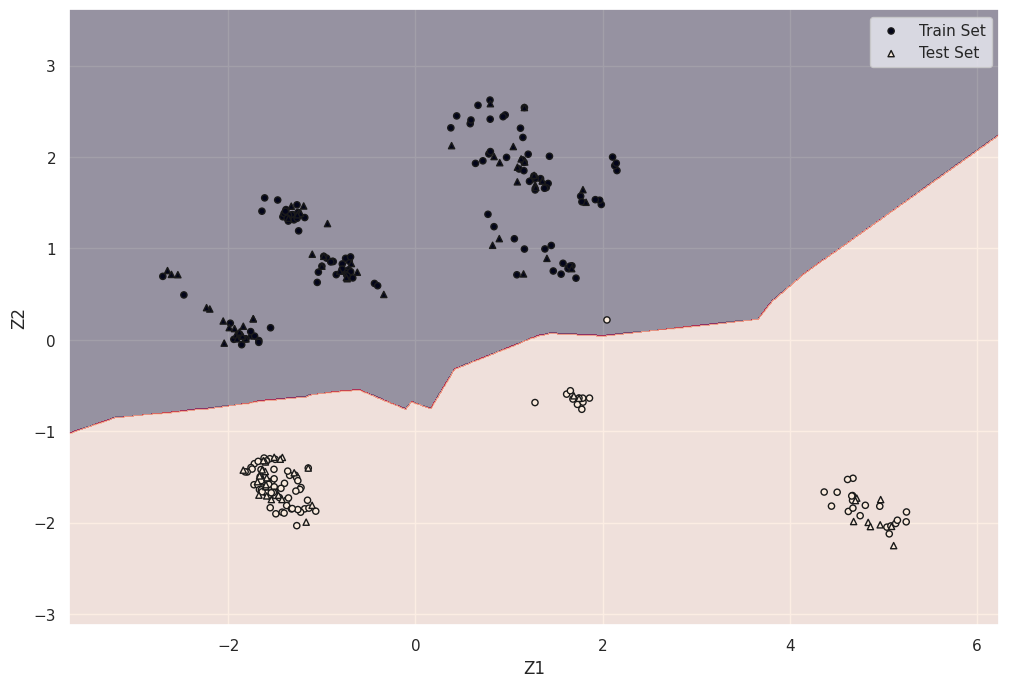

In [46]:
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()


Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.001033  0.001014  0.000975  0.001469  0.001041
dt_Z  fit_time              0.001474  0.001396  0.001396  0.001458  0.001287
dt_Z12 fit_time             0.001215  0.001211  0.001273  0.001145  0.001167
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         1.000000  1.000000  1.000000  1.000000  0.976068
dt_Z12 test_f1_macro        1.000000  1.000000  1.000000  1.000000  0.976068

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        33

    accuracy                          1.000        90
   macro avg      1.000     1.000     1.000        90
weighted avg      1.000     1.000    

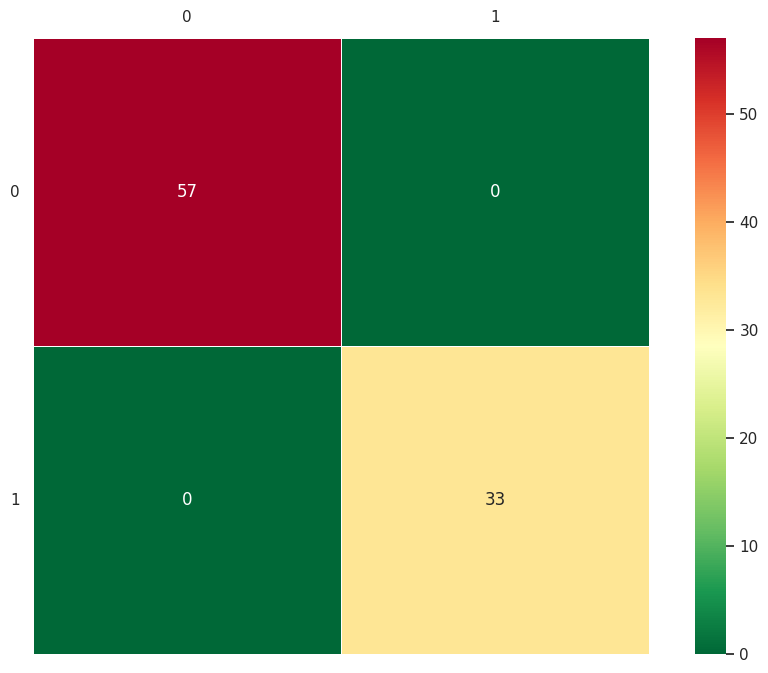

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        33

    accuracy                          1.000        90
   macro avg      1.000     1.000     1.000        90
weighted avg      1.000     1.000     1.000        90



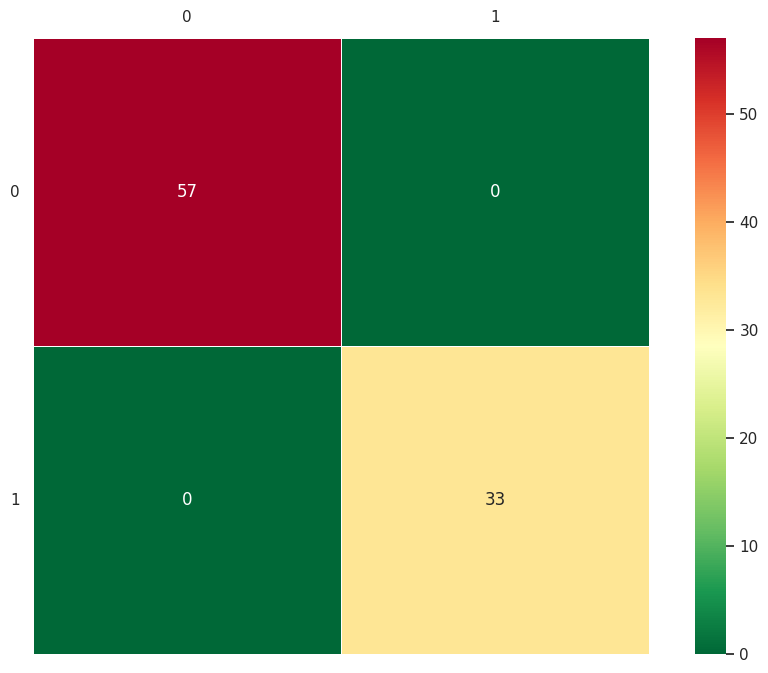

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        57
           2      1.000     1.000     1.000        33

    accuracy                          1.000        90
   macro avg      1.000     1.000     1.000        90
weighted avg      1.000     1.000     1.000        90



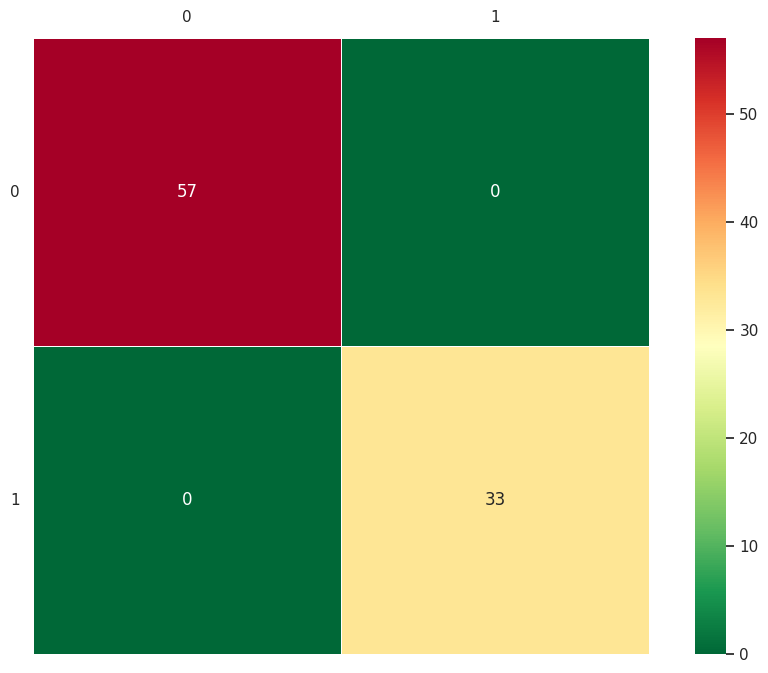

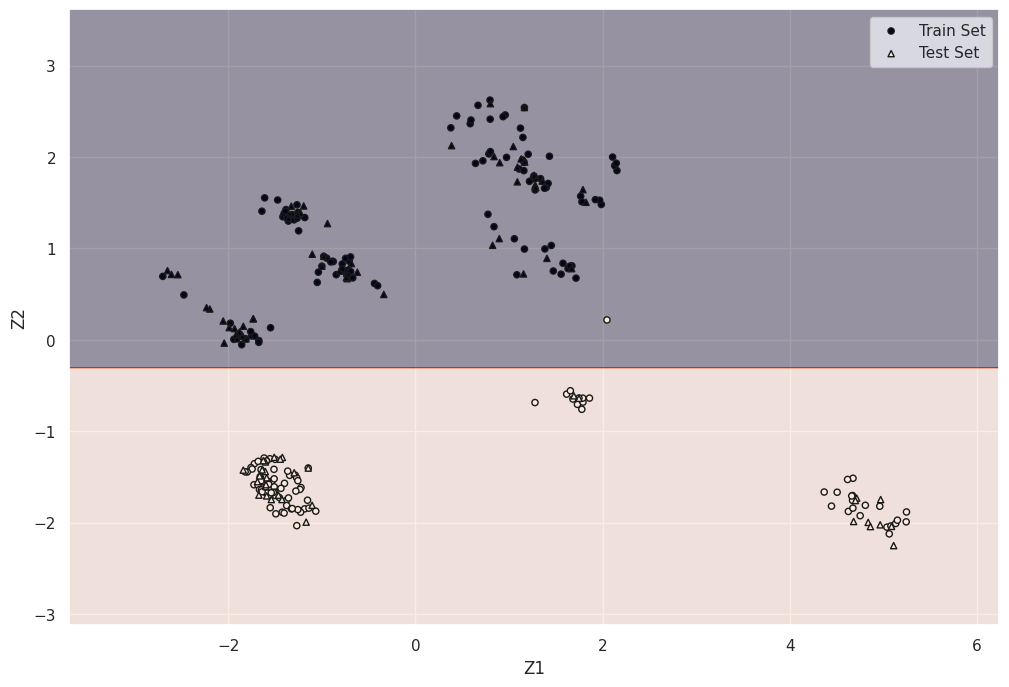

In [47]:
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


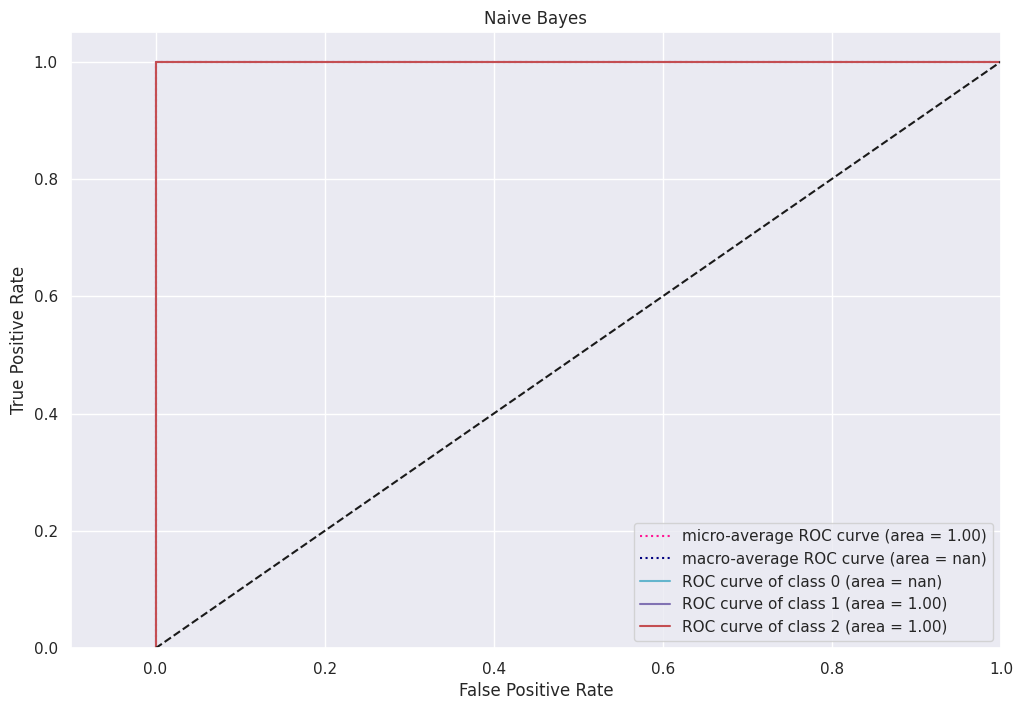

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


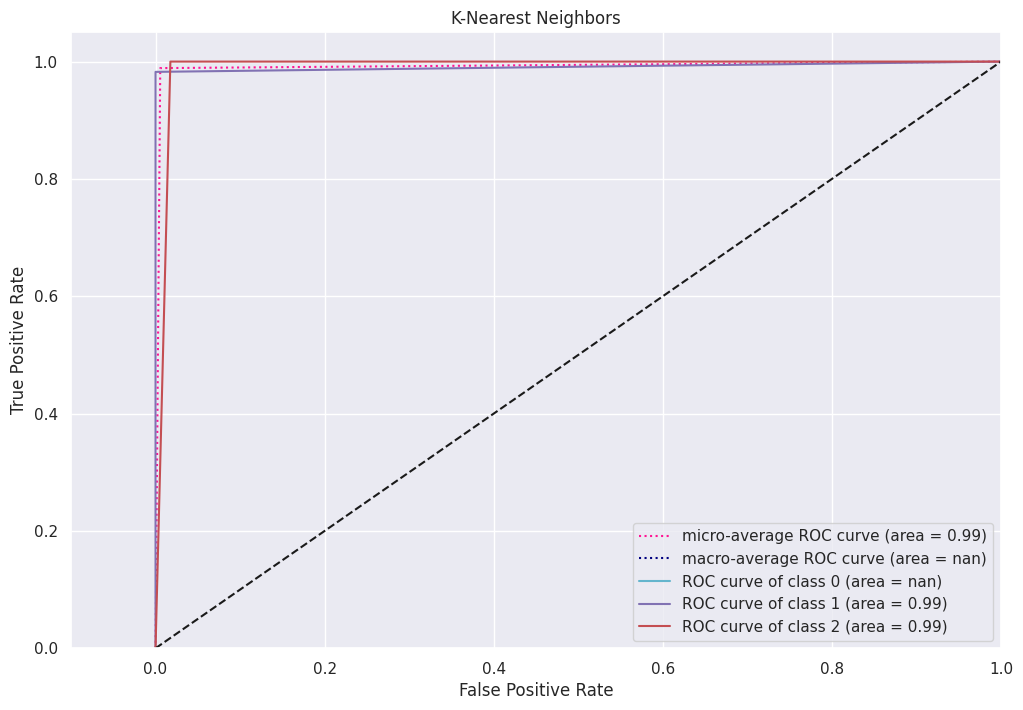

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


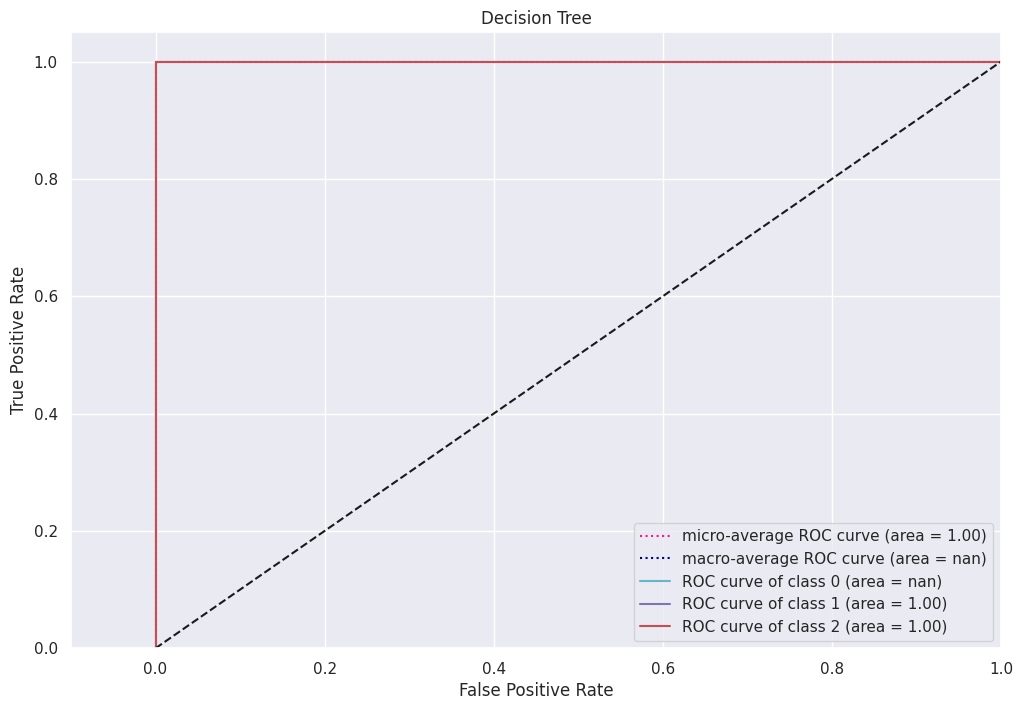

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


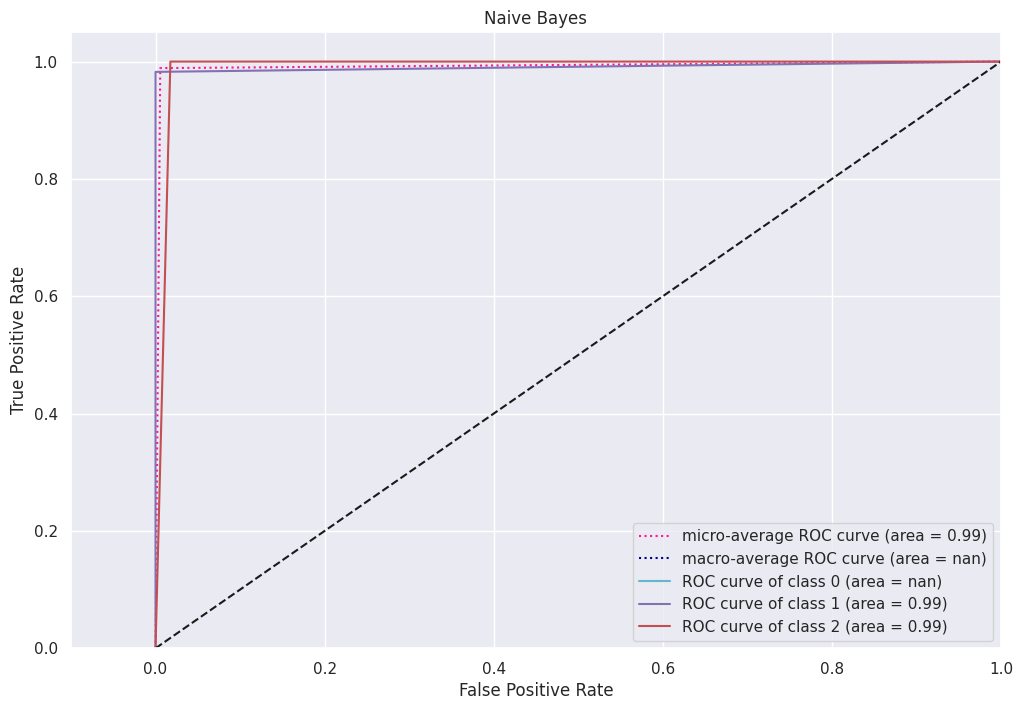

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


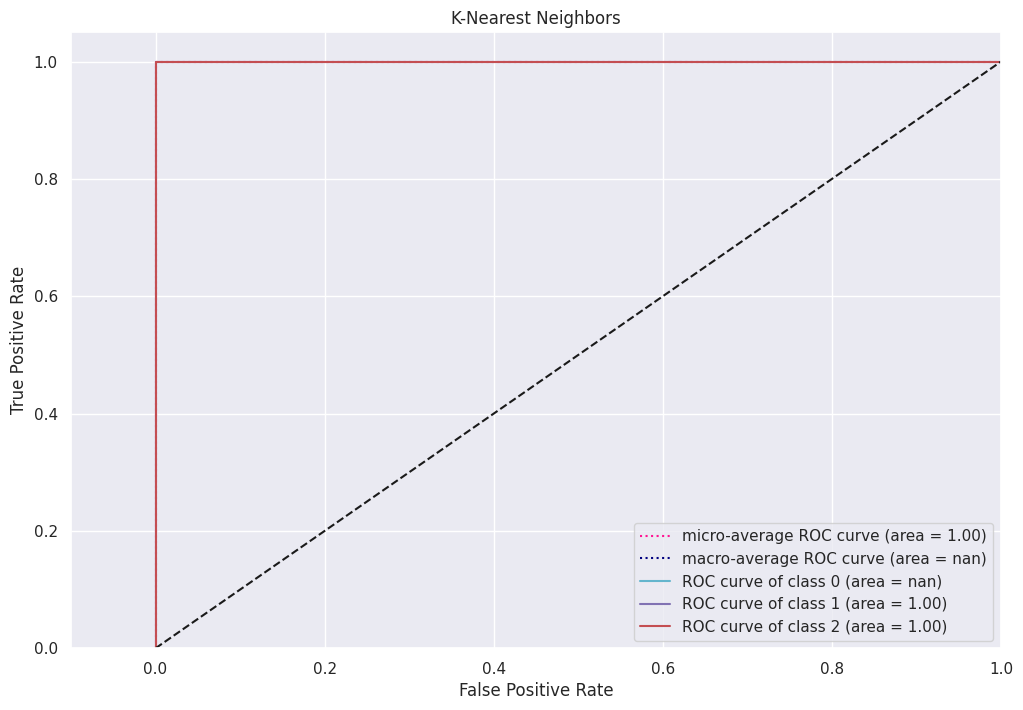

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


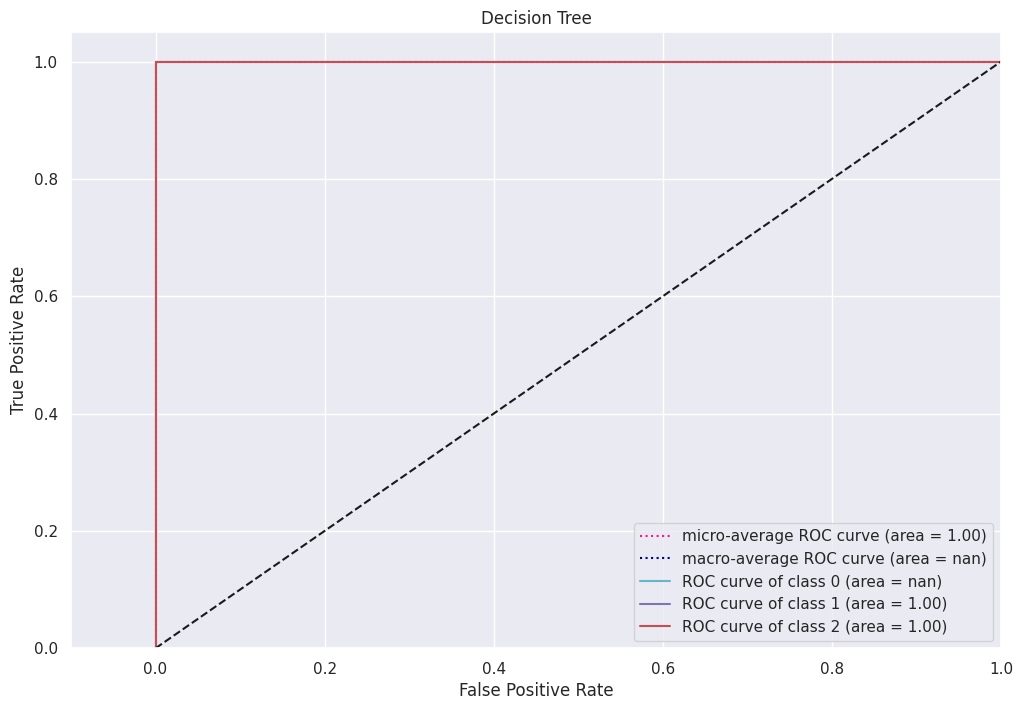

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


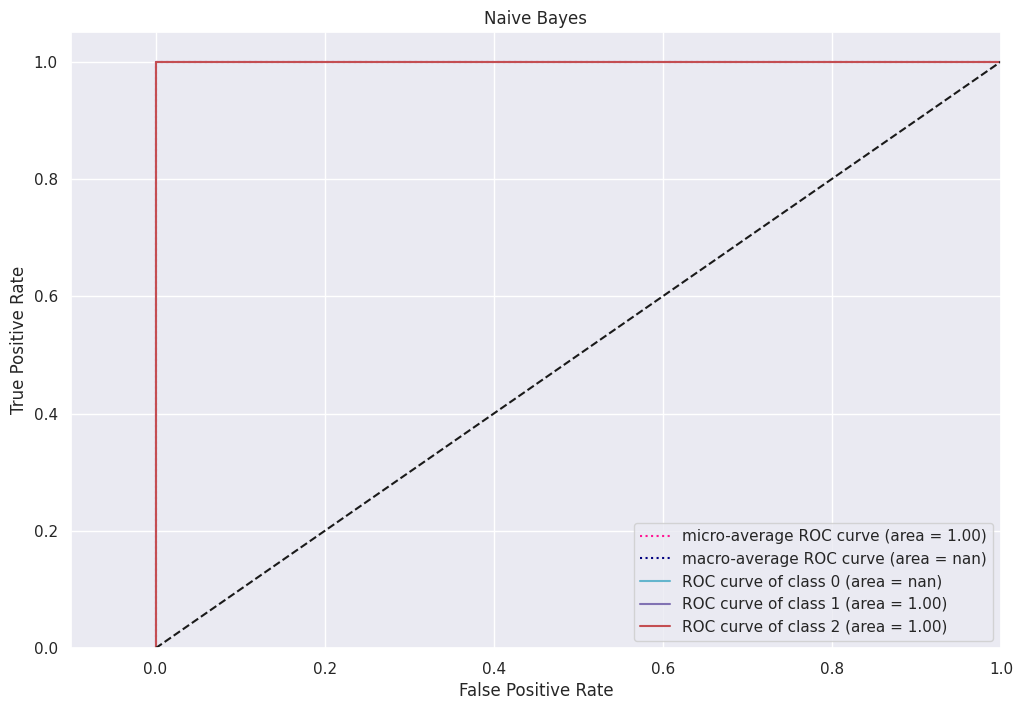

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


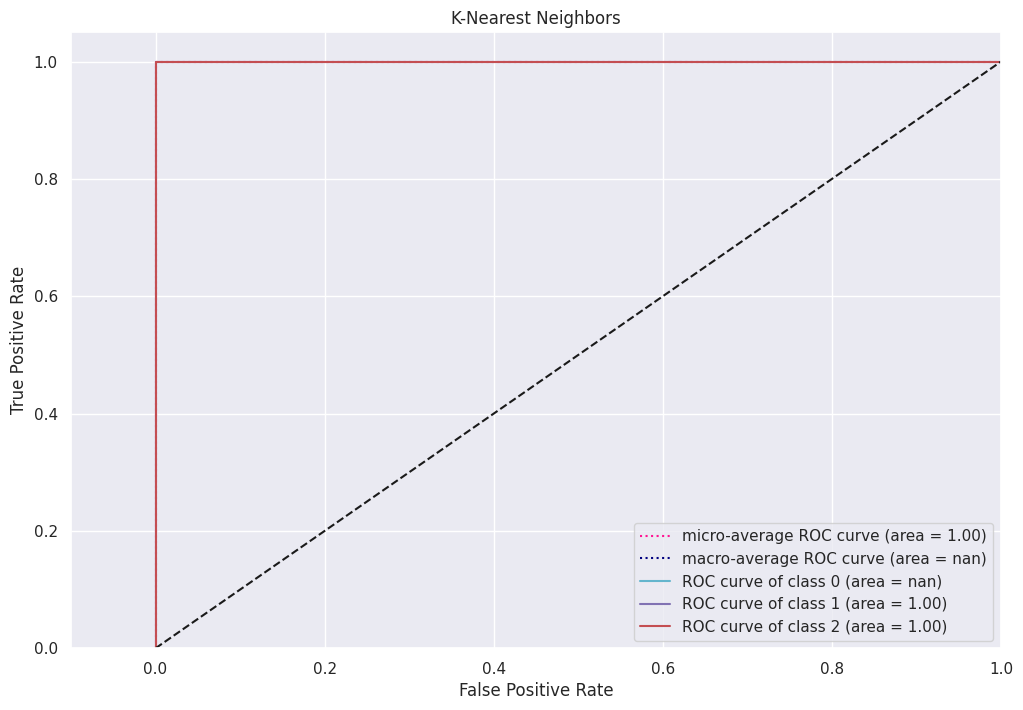

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


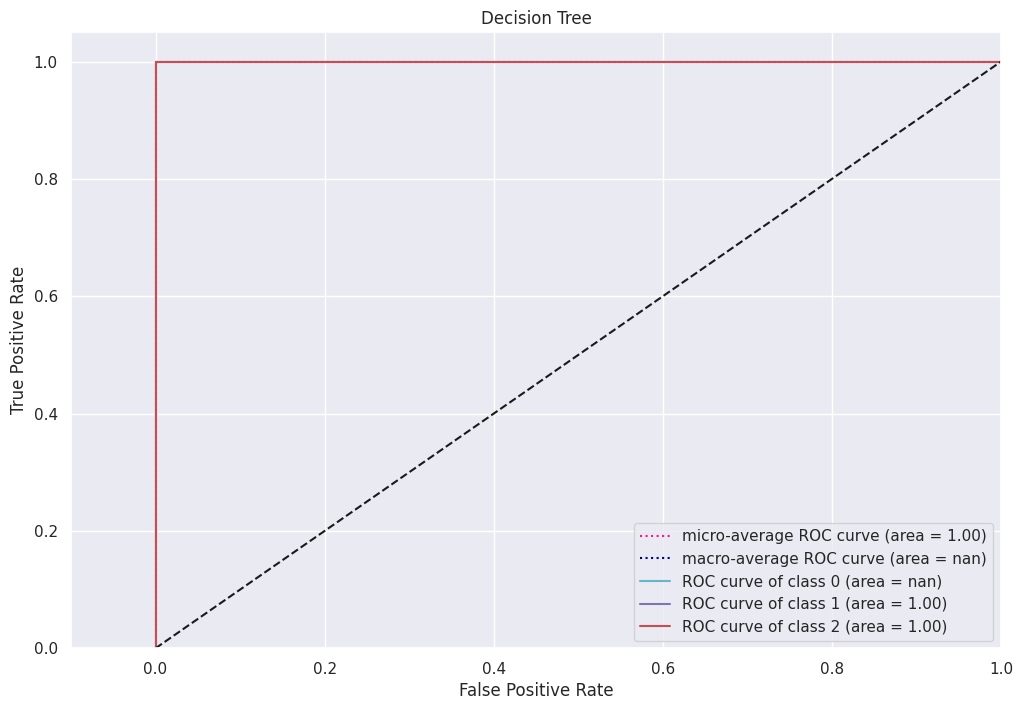

In [48]:
datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

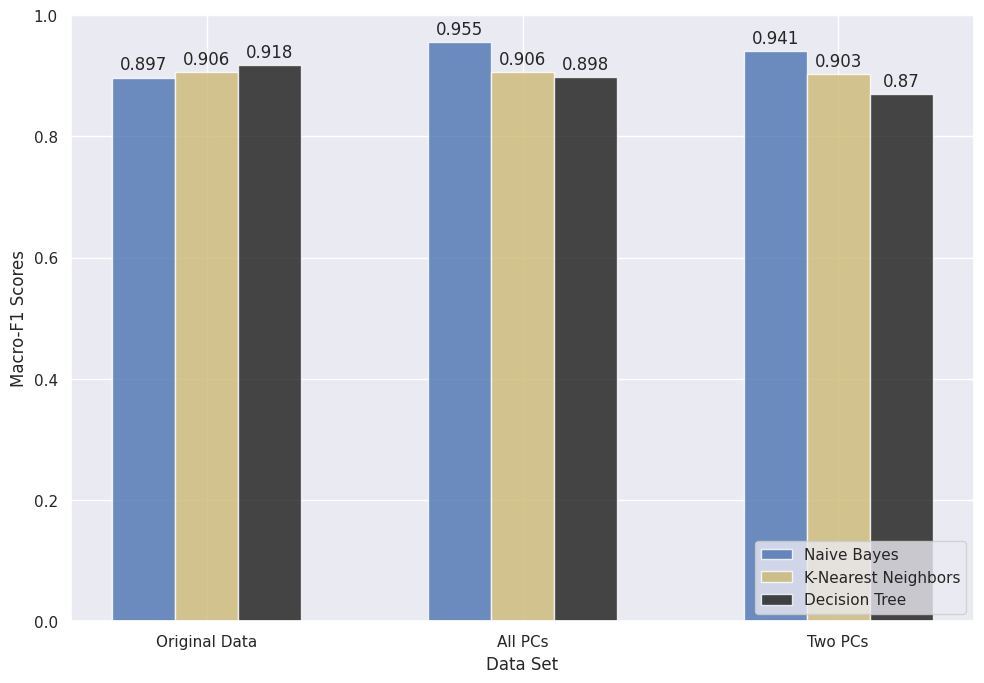

In [49]:
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()